In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

For Full California

EDA

In [123]:
data_cali_all = pd.read_csv("/Users/welpp/Desktop/Advanced Applied Computing/Machine/DataFile2/climate_cali_all.csv",
                            parse_dates=['date'],
                            index_col='date')

In [126]:
data_cali_all = data_cali_all.dropna()
data_cali_all.head()

PRCP      SNOW      SNWD       TAVG       TMAX       TMIN  \
date                                                                        
2000-01-01  0.033077  0.024932  0.245902  37.919355  49.363964  32.151625   
2000-01-02  0.038143  0.077112  0.303523  36.723473  48.486679  29.369449   
2000-01-03  0.009316  0.008672  0.295082  41.067524  53.723183  30.416955   
2000-01-04  0.036319  0.008943  0.271739  42.692308  55.250429  32.920962   
2000-01-05  0.007203  0.002717  0.286096  41.115756  55.063574  31.596220   

            Fire  
date              
2000-01-01     0  
2000-01-02     0  
2000-01-03     0  
2000-01-04     0  
2000-01-05     0

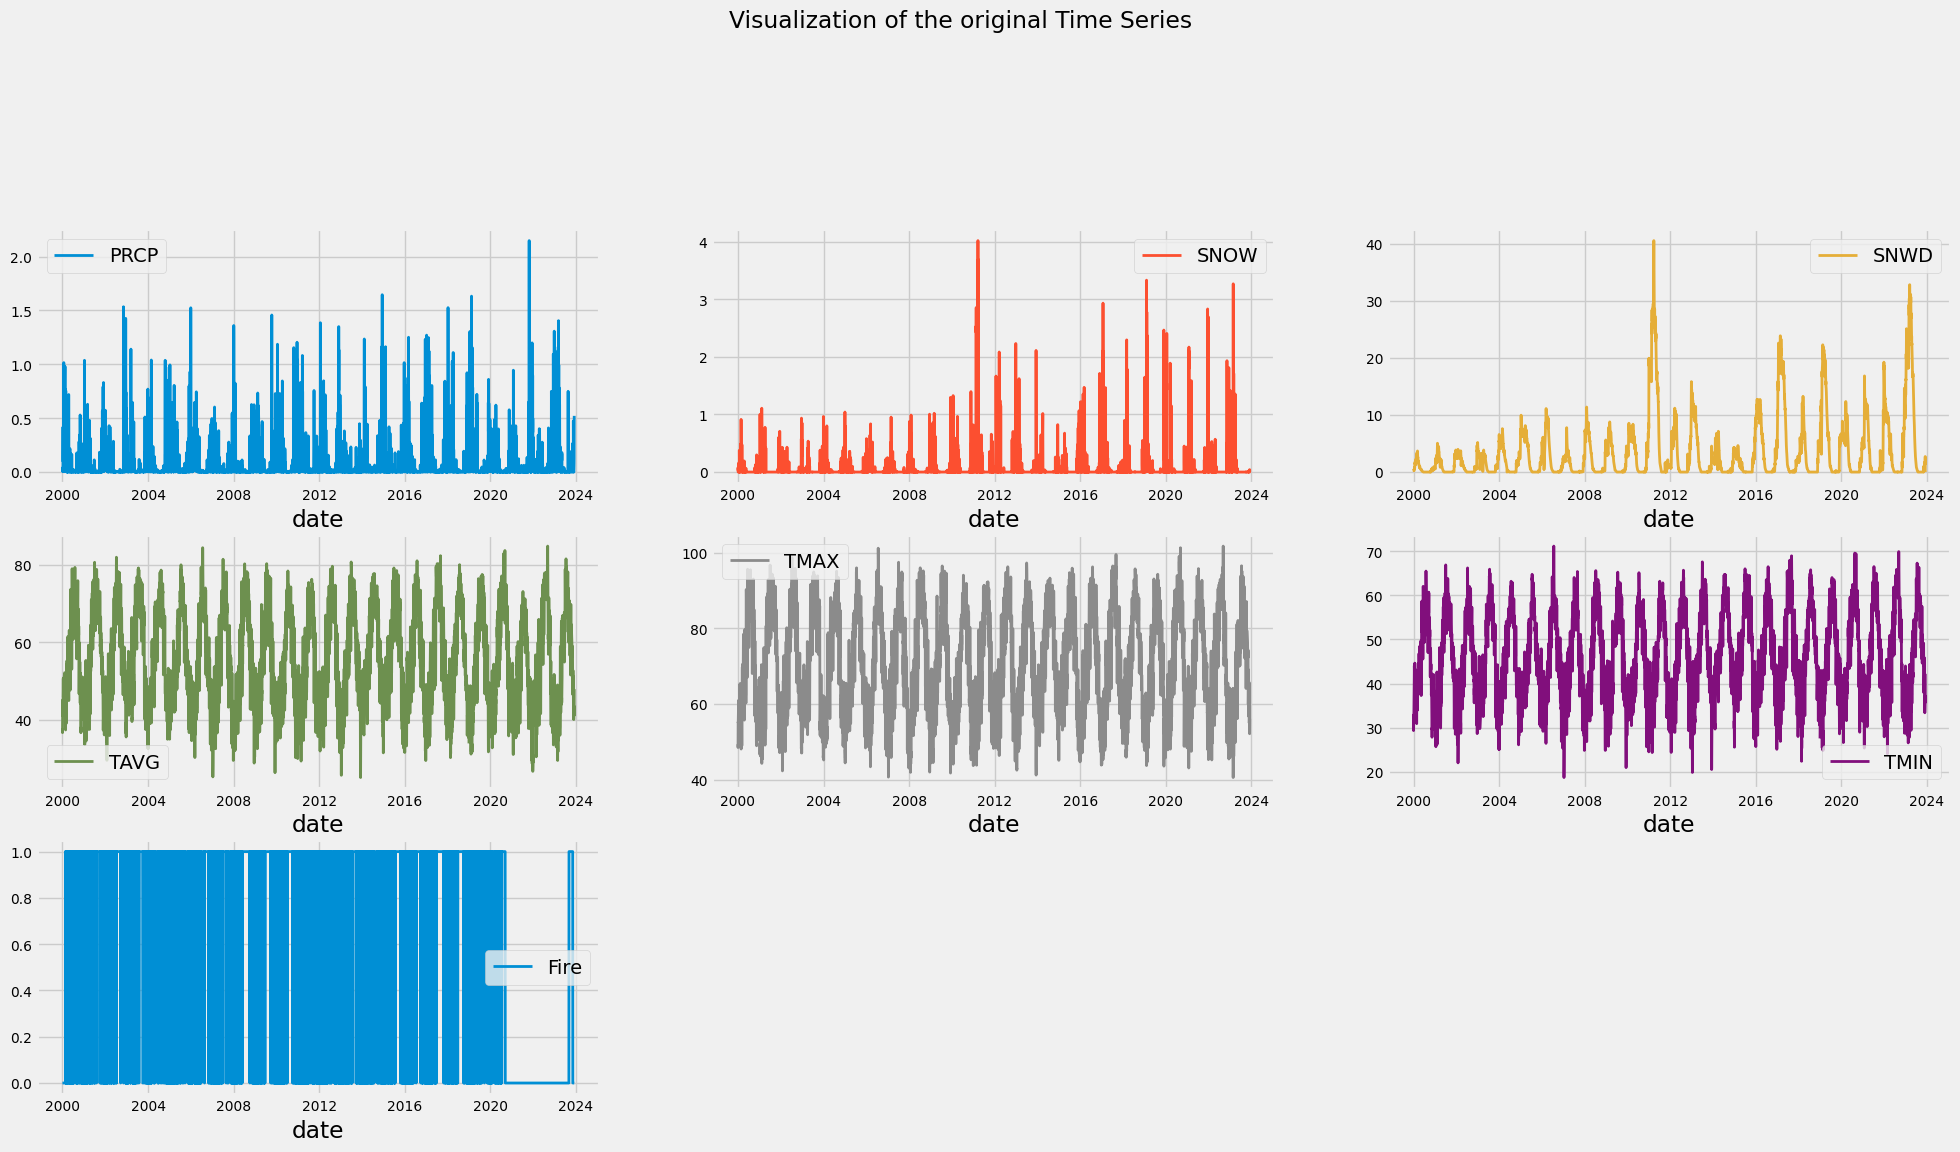

In [8]:
plt.style.use('fivethirtyeight')
data_cali_all.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10, 
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

Data Processing

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [166]:
train = data_cali_all[data_cali_all.index < '2022-01-01']
test = data_cali_all[data_cali_all.index >= '2022-01-01']

X_train = train.drop('Fire', axis=1)
y_train = train['Fire']

X_test = test.drop('Fire', axis=1)
y_test = test['Fire']

scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
## train
sequence_length = 14 
sequences = []
labels = []

for i in range(len(X_train_scaled) - sequence_length):
    seq = X_train_scaled[i:i+sequence_length]
    label = y_train[i+sequence_length]
    sequences.append(seq)
    labels.append(label)

X_train_format = np.array(sequences)
y_train_format = np.array(labels)

X_train_format = X_train_format.reshape(X_train_format.shape[0], X_train_format.shape[1], 6)

## test
sequences_test = []
labels_test = []

for i in range(len(X_test_scaled) - sequence_length):
    seq = X_test_scaled[i:i+sequence_length]
    label = y_test[i+sequence_length]
    sequences_test.append(seq)
    labels_test.append(label)

X_test_format = np.array(sequences_test)
y_test_format = np.array(labels_test)

X_test_format = X_test_format.reshape(X_test_format.shape[0], X_test_format.shape[1], 6)

/var/folders/2l/gth0qrwj2pz4xnsyq6_nl5h80000gn/T/ipykernel_1764/3931643687.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = y_train[i+sequence_length]
/var/folders/2l/gth0qrwj2pz4xnsyq6_nl5h80000gn/T/ipykernel_1764/3931643687.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = y_test[i+sequence_length]


ModelS

In [305]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, TimeDistributed, Bidirectional, Flatten, MaxPooling1D
from tensorflow.keras.layers import Dropout, BatchNormalization
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

LSTM -- 1

In [169]:
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, activation='relu', input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
model1.add(LSTM(units=50, return_sequences=True, activation='relu', input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
model1.add(LSTM(units=50, activation='relu', input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
model1.add(Dense(units=100, activation='relu'))
model1.add(Dense(units=100, activation='relu'))
model1.add(Dense(units=1, activation = 'sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])

In [170]:
history1 = model1.fit(X_train_format, y_train_format, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
245/245 [==============================] - 3s 9ms/step - loss: 0.5466 - accuracy: 0.7292
Epoch 2/30
245/245 [==============================] - 2s 9ms/step - loss: 0.4951 - accuracy: 0.7617
Epoch 3/30
245/245 [==============================] - 2s 10ms/step - loss: 0.4897 - accuracy: 0.7605
Epoch 4/30
245/245 [==============================] - 2s 10ms/step - loss: 0.4881 - accuracy: 0.7656
Epoch 5/30
245/245 [==============================] - 2s 9ms/step - loss: 0.4880 - accuracy: 0.7663
Epoch 6/30
245/245 [==============================] - 2s 9ms/step - loss: 0.4849 - accuracy: 0.7692
Epoch 7/30
245/245 [==============================] - 2s 9ms/step - loss: 0.4817 - accuracy: 0.7746
Epoch 8/30
245/245 [==============================] - 2s 9ms/step - loss: 0.4811 - accuracy: 0.7742
Epoch 9/30
245/245 [==============================] - 2s 9ms/step - loss: 0.4881 - accuracy: 0.7687
Epoch 10/30
245/245 [==============================] - 2s 9ms/step - loss: 0.4774 - accuracy: 0.77

Conv1D  -- 3

In [330]:
model3 = Sequential()
model3.add(Conv1D(64, 2, activation="relu", input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
model3.add(Dense(100, activation="relu"))
model3.add(Conv1D(64, 2, activation="relu", input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
model3.add(Dense(100, activation="relu"))
model3.add(Conv1D(64, 2, activation="relu", input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
model3.add(MaxPooling1D())
model3.add(Flatten())
model3.add(Dense(100, activation="relu"))
model3.add(Dense(100, activation="relu"))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [331]:
history3 = model3.fit(X_train_format, y_train_format, epochs=100, verbose=1)

Epoch 1/100
88/88 [==============================] - 1s 3ms/step - loss: 0.5506 - accuracy: 0.9059
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 0.2796 - accuracy: 0.9244
Epoch 3/100
88/88 [==============================] - 0s 4ms/step - loss: 0.2768 - accuracy: 0.9244
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 0.2735 - accuracy: 0.9244
Epoch 5/100
88/88 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 0.9244
Epoch 6/100
88/88 [==============================] - 0s 4ms/step - loss: 0.2754 - accuracy: 0.9244
Epoch 7/100
88/88 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 0.9244
Epoch 8/100
88/88 [==============================] - 0s 4ms/step - loss: 0.2655 - accuracy: 0.9244
Epoch 9/100
88/88 [==============================] - 0s 4ms/step - loss: 0.2757 - accuracy: 0.9244
Epoch 10/100
88/88 [==============================] - 0s 4ms/step - loss: 0.2649 - accuracy: 0.9244
Epoch 11/

Simple NN

In [319]:
model4 = Sequential()
model4.add(Dense(100, activation="relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))
model4.add(Dense(100, activation="relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))
model4.add(Dense(100, activation="relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))
model4.add(Dense(100, activation="relu"))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [321]:
history4 = model4.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
89/89 [==============================] - 0s 1ms/step - loss: 0.2397 - accuracy: 0.9245
Epoch 2/100
89/89 [==============================] - 0s 1ms/step - loss: 0.2469 - accuracy: 0.9245
Epoch 3/100
89/89 [==============================] - 0s 1ms/step - loss: 0.2369 - accuracy: 0.9245
Epoch 4/100
89/89 [==============================] - 0s 1ms/step - loss: 0.2406 - accuracy: 0.9245
Epoch 5/100
89/89 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.9245
Epoch 6/100
89/89 [==============================] - 0s 1ms/step - loss: 0.2458 - accuracy: 0.9245
Epoch 7/100
89/89 [==============================] - 0s 1ms/step - loss: 0.2420 - accuracy: 0.9245
Epoch 8/100
89/89 [==============================] - 0s 1ms/step - loss: 0.2385 - accuracy: 0.9245
Epoch 9/100
89/89 [==============================] - 0s 1ms/step - loss: 0.2417 - accuracy: 0.9245
Epoch 10/100
89/89 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.9245
Epoch 11/

Evaluation
Change model

In [332]:
y_pred = model3.predict(X_test_format)
fpr, tpr, thresholds = roc_curve(y_test_format, y_pred)
roc_auc = auc(fpr, tpr)

youden_j = tpr - fpr
best_threshold_index = np.argmax(youden_j)
best_threshold = thresholds[best_threshold_index]

21/21 [==============================] - 0s 1ms/step


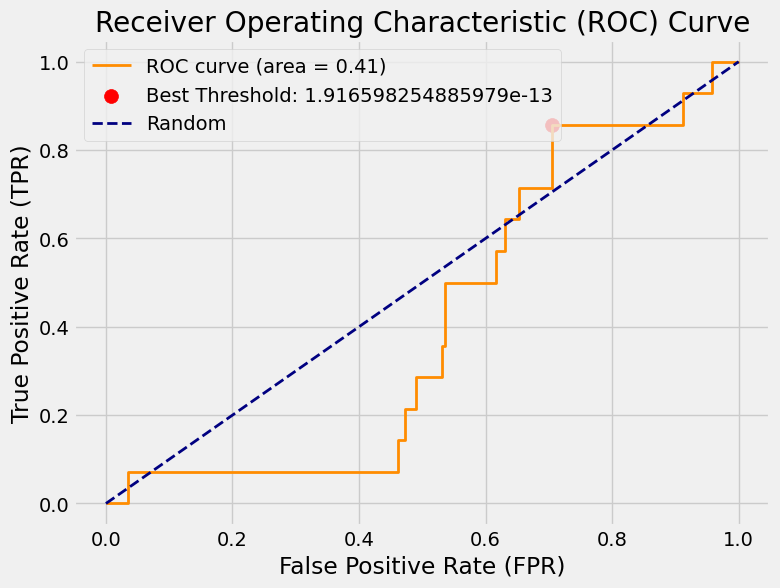

In [333]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold: {best_threshold}', s=100, marker='o')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [335]:
y_pred_binary = (y_pred > best_threshold).astype(int)
conf_matrix = confusion_matrix(y_test_format, y_pred_binary)
classification_rep = classification_report(y_test_format, y_pred_binary)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[191 456]
 [  3  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.30      0.45       647
           1       0.02      0.79      0.05        14

    accuracy                           0.31       661
   macro avg       0.50      0.54      0.25       661
weighted avg       0.96      0.31      0.45       661



In [325]:
print(f"Accuracy Score: {accuracy_score(y_pred_binary, y_test)}")
print(f"F-1 Score: {f1_score(y_pred_binary, y_test)}")

Accuracy Score: 0.4399421128798842
F-1 Score: 0.034912718204488775


For each counties

In [378]:
data_county_all = pd.read_csv("/Users/welpp/Desktop/Advanced Applied Computing/Machine/DataFile2/data_county_final2.csv",
                            parse_dates=['date'],
                            index_col='date')

/var/folders/2l/gth0qrwj2pz4xnsyq6_nl5h80000gn/T/ipykernel_1764/3712771386.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data_county_all = pd.read_csv("/Users/welpp/Desktop/Advanced Applied Computing/Machine/DataFile2/data_county_final2.csv",


In [379]:
data_county_all['PRCP'].fillna(0, inplace=True)
data_county_all['SNOW'].fillna(0, inplace=True)
data_county_all['SNWD'].fillna(0, inplace=True)

In [380]:
data_county_all = data_county_all[['CountyCode', 'CountyName', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'Elevation']]

In [370]:
missing_values = data_county_all.isna()
print(missing_values)

            CountyCode  CountyName   PRCP   SNOW   SNWD  TAVG  TMAX  TMIN  \
date                                                                        
2018-12-30       False       False  False  False  False  True  True  True   
2018-12-30       False       False  False  False  False  True  True  True   
2018-12-30       False       False  False  False  False  True  True  True   
2018-12-30       False       False  False  False  False  True  True  True   
2018-12-30       False       False  False  False  False  True  True  True   

            Elevation  
date                   
2018-12-30      False  
2018-12-30      False  
2018-12-30      False  
2018-12-30      False  
2018-12-30      False  


In [381]:
data_county_all = data_county_all.drop(data_county_all[data_county_all['CountyName'] == 'Calaveras'].index)
data_county_all = data_county_all.drop(data_county_all[data_county_all['CountyName'] == 'Napa'].index)
data_county_all = data_county_all.drop(data_county_all[data_county_all['CountyName'] == 'San Francisco'].index)
data_county_all = data_county_all.drop(data_county_all[data_county_all['CountyName'] == 'Sutter'].index)
data_county_all = data_county_all.drop(data_county_all[data_county_all['CountyName'] == 'San Joaquin'].index)

In [371]:
missing_counts = data_county_all.isna().sum()
print(missing_counts)

CountyCode    0
CountyName    0
PRCP          0
SNOW          0
SNWD          0
TAVG          5
TMAX          5
TMIN          5
Elevation     0
dtype: int64


In [382]:
data_county_all = data_county_all.dropna()
data_county_all.head()

Empty DataFrame
Columns: [CountyCode, CountyName, PRCP, SNOW, SNWD, TAVG, TMAX, TMIN, Elevation]
Index: []

In [383]:
county_dfs = {county: group for county, group in data_county_all.groupby('CountyName')}

for county, county_df in county_dfs.items():
    globals()[f'county_{county}_df'] = county_df

EDA

In [384]:
## visualization for each county.. dont acutally run it
for county, county_df in county_dfs.items():
    plt.style.use('fivethirtyeight')
    county_df[['PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN']].plot(subplots=True,
                    layout=(6, 3),
                    figsize=(22, 22),
                    fontsize=10,
                    linewidth=2,
                    sharex=False,
                    title=f'Visualization of the Time Series for {county} County')
    plt.show()

In [293]:
scaled_county_dfs = {}

# Loop through each county DataFrame
for county, county_df in county_dfs.items():
    # Separate into train and test sets based on the index
    train = county_df[county_df.index < '2022-01-01']
    test = county_df[county_df.index >= '2022-01-01']

    # Extract features and labels for train and test sets
    X_train = train.drop(columns=['CountyCode', 'CountyName', 'Fire'])
    y_train = train['Fire']
    X_test = test.drop(columns=['CountyCode', 'CountyName', 'Fire'])
    y_test = test['Fire']

    # Scale the features using StandardScaler
    # scaler = StandardScaler()
    # scaler.fit(X_train)
    # X_train_scaled = scaler.transform(X_train)
    # X_test_scaled = scaler.transform(X_test)

    # Store scaled DataFrames in the dictionary
    scaled_county_dfs[county] = {
        'X_train_scaled': X_train,
        'y_train': y_train,
        'X_test_scaled': X_test,
        'y_test': y_test
    }

In [307]:
sequence_length = 30

# Dictionary to store formatted training and testing data
formatted_county_data = {}

# Loop through each county DataFrame
for county, scaled_data in scaled_county_dfs.items():
    print(f"for the {county}")
    X_train_scaled = scaled_data['X_train_scaled']
    y_train = scaled_data['y_train']
    X_test_scaled = scaled_data['X_test_scaled']
    y_test = scaled_data['y_test']

    # Train data formatting
    sequences_train = []
    labels_train = []

    for i in range(len(X_train_scaled) - sequence_length):
        seq_train = X_train_scaled[i:i+sequence_length]
        label_train = y_train.iloc[i+sequence_length]
        sequences_train.append(seq_train)
        labels_train.append(label_train)

    X_train_format = np.array(sequences_train)
    y_train_format = np.array(labels_train)

    X_train_format = X_train_format.reshape(X_train_format.shape[0], X_train_format.shape[1], X_train_format.shape[2])

    # Test data formatting
    sequences_test = []
    labels_test = []

    for i in range(len(X_test_scaled) - sequence_length):
        seq_test = X_test_scaled[i:i+sequence_length]
        label_test = y_test.iloc[i+sequence_length]
        sequences_test.append(seq_test)
        labels_test.append(label_test)

    X_test_format = np.array(sequences_test)
    y_test_format = np.array(labels_test)

    X_test_format = X_test_format.reshape(X_test_format.shape[0], X_test_format.shape[1], X_test_format.shape[2])

    # Store formatted data in the dictionary
    formatted_county_data[county] = {
        'X_train_format': X_train_format,
        'y_train_format': y_train_format,
        'X_test_format': X_test_format,
        'y_test_format': y_test_format
    }

for the Alameda
for the Alpine
for the Amador
for the Butte
for the Colusa
for the Contra Costa
for the Del Norte
for the El Dorado
for the Fresno
for the Glenn
for the Humboldt
for the Imperial
for the Inyo
for the Kern
for the Kings
for the Lake
for the Lassen
for the Los Angeles
for the Madera
for the Marin
for the Mariposa
for the Mendocino
for the Merced
for the Modoc
for the Mono
for the Monterey
for the Nevada
for the Orange
for the Placer
for the Plumas
for the Riverside
for the Sacramento
for the San Benito
for the San Bernardino
for the San Diego
for the San Joaquin
for the San Luis Obispo
for the San Mateo
for the Santa Barbara
for the Santa Clara
for the Santa Cruz
for the Shasta
for the Sierra
for the Siskiyou
for the Sonoma
for the Stanislaus
for the Tehama
for the Trinity
for the Tulare
for the Tuolumne
for the Ventura
for the Yolo
for the Yuba


Models

In [312]:
# Dictionary to store models for all counties
all_county_models = {}

# Loop through each county and build the model
for county, formatted_data in formatted_county_data.items():
    X_train_format = formatted_data['X_train_format']
    y_train_format = formatted_data['y_train_format']

    # Build Conv1D model
    model = Sequential()
    model.add(Conv1D(64, 2, activation="relu", input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, 2, activation="relu", input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Conv1D(64, 2, activation="relu", input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True activation='relu', input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, activation='relu', input_shape=(X_train_format.shape[1], X_train_format.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    print(f'building for {county}')
    # Train the model
    model.fit(X_train_format, y_train_format, epochs=20, batch_size=1)

    # Store the model in the dictionary
    all_county_models[county] = model

building for Alameda
Epoch 1/20
3127/3127 [==============================] - 21s 6ms/step - loss: 4.6654 - accuracy: 0.9258
Epoch 2/20
3127/3127 [==============================] - 19s 6ms/step - loss: 0.3651 - accuracy: 0.9389
Epoch 3/20
3127/3127 [==============================] - 18s 6ms/step - loss: 0.2542 - accuracy: 0.9498
Epoch 4/20
3127/3127 [==============================] - 18s 6ms/step - loss: 1.6768 - accuracy: 0.9431
Epoch 5/20
3127/3127 [==============================] - 18s 6ms/step - loss: 0.2437 - accuracy: 0.9501
Epoch 6/20
3127/3127 [==============================] - 18s 6ms/step - loss: 0.8625 - accuracy: 0.9373
Epoch 7/20
3127/3127 [==============================] - 18s 6ms/step - loss: 0.8058 - accuracy: 0.9408
Epoch 8/20
3127/3127 [==============================] - 18s 6ms/step - loss: 0.4264 - accuracy: 0.9444
Epoch 9/20
3127/3127 [==============================] - 18s 6ms/step - loss: 0.2861 - accuracy: 0.9444
Epoch 10/20
3127/3127 [=============================

In [343]:
# Dictionary to store models for all counties
all_county_models_nn = {}

# Loop through each county and build the model
for county, formatted_data in scaled_county_dfs.items():
    X_train_format = formatted_data['X_train_scaled']
    y_train_format = formatted_data['y_train']

    # Build Conv1D model
    model = Sequential()
    model.add(Dense(100, activation="relu"))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    print(f'building for {county}')
    # Train the model
    model.fit(X_train_format, y_train_format, epochs=30, batch_size=1)

    # Store the model in the dictionary
    all_county_models[county] = model

building for Alameda
Epoch 1/30
3157/3157 [==============================] - 2s 676us/step - loss: 0.2934 - accuracy: 0.9474
Epoch 2/30
3157/3157 [==============================] - 2s 684us/step - loss: 0.2258 - accuracy: 0.9506
Epoch 3/30
3157/3157 [==============================] - 2s 671us/step - loss: 0.1997 - accuracy: 0.9509
Epoch 4/30
3157/3157 [==============================] - 2s 679us/step - loss: 0.1959 - accuracy: 0.9503
Epoch 5/30
3157/3157 [==============================] - 2s 670us/step - loss: 0.2204 - accuracy: 0.9506
Epoch 6/30
3157/3157 [==============================] - 2s 674us/step - loss: 0.2055 - accuracy: 0.9509
Epoch 7/30
3157/3157 [==============================] - 2s 667us/step - loss: 0.1993 - accuracy: 0.9506
Epoch 8/30
3157/3157 [==============================] - 2s 716us/step - loss: 0.2076 - accuracy: 0.9506
Epoch 9/30
3157/3157 [==============================] - 2s 669us/step - loss: 0.1939 - accuracy: 0.9509
Epoch 10/30
3157/3157 [====================

Eval

In [338]:
all_county_results = {}

y_pred_total = []
y_test_total = []

# Loop through each county and apply ROC curve analysis
for county, model in all_county_models.items():
    if county not in formatted_county_data:
        print(f"Data not available for {county} County.")
        continue
    else:
        print(county)

    formatted_data = formatted_county_data[county]
    X_test_format = formatted_data['X_test_format']
    y_test_format = formatted_data['y_test_format']

    # Predictions
    y_pred = model.predict(X_test_format)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_format, y_pred)
    roc_auc = auc(fpr, tpr)

    # Find the best threshold using Youden's J statistic
    youden_j = tpr - fpr
    best_threshold_index = np.argmax(youden_j)
    best_threshold = thresholds[best_threshold_index]

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold: {best_threshold}', s=100, marker='o')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {county} County')
    plt.legend()
    plt.show()

    # Convert predictions to binary using the best threshold
    y_pred_binary = (y_pred > best_threshold).astype(int)

    y_pred_total.extend(y_pred)
    y_test_total.extend(y_test_format)

    # Calculate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test_format, y_pred_binary)
    classification_rep = classification_report(y_test_format, y_pred_binary)
    accuracy = accuracy_score(y_test_format, y_pred_binary)
    f1 = f1_score(y_test_format, y_pred_binary)

    # Store results in the dictionary
    all_county_results[county] = {
        'roc_auc': roc_auc,
        'best_threshold': best_threshold,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_rep
    }

    print(f"Accuracy Score: {accuracy}")
    print(f"F-1 Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_rep)

## For overall
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_total, y_pred_total)
roc_auc = auc(fpr, tpr)

# Find the best threshold using Youden's J statistic
youden_j = tpr - fpr
best_threshold_index = np.argmax(youden_j)
best_threshold = thresholds[best_threshold_index]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold: {best_threshold}', s=100, marker='o')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - Total')
plt.legend()
plt.show()

# Convert predictions to binary using the best threshold
y_pred_binary = (y_pred_total > best_threshold).astype(int)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_total, y_pred_binary)
classification_rep = classification_report(y_test_total, y_pred_binary)
accuracy = accuracy_score(y_test_total, y_pred_binary)
f1 = f1_score(y_test_total, y_pred_binary)

print(f"Accuracy Score: {accuracy}")
print(f"F-1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Alameda


ValueError: in user code:

    File "/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_477' (type Sequential).
    
    Input 0 of layer "batch_normalization_3" is incompatible with the layer: expected ndim=2, found ndim=3. Full shape received: (None, 30, 100)
    
    Call arguments received by layer 'sequential_477' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 30, 7), dtype=float32)
      • training=False
      • mask=None


Alameda
22/22 [==============================] - 0s 456us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


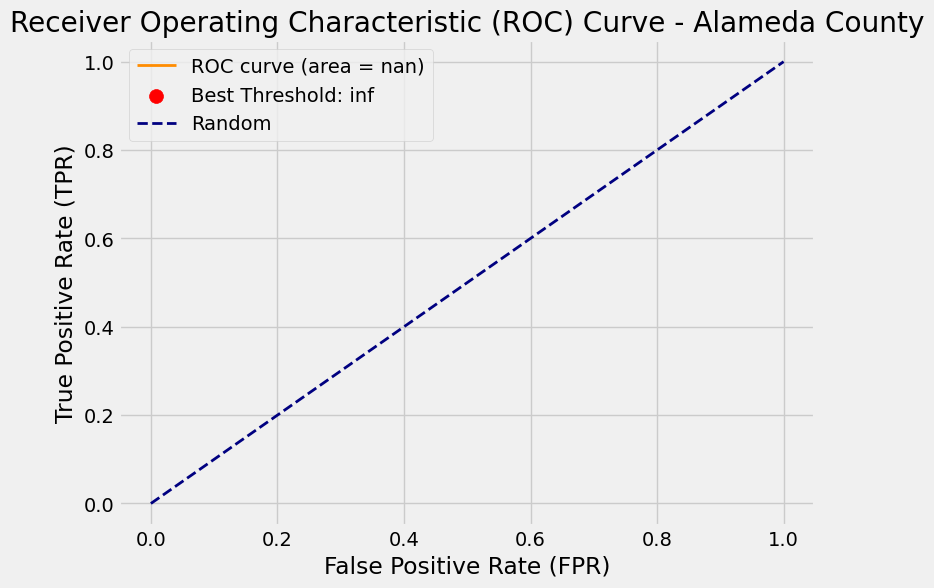

Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[686]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       686

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Alpine
22/22 [==============================] - 0s 497us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


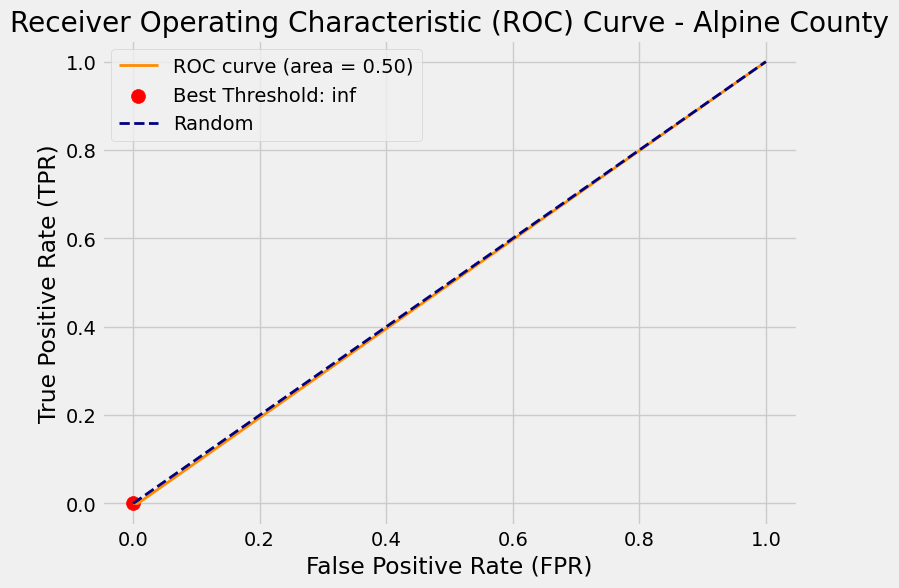

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Accuracy Score: 0.9985401459854014
F-1 Score: 0.0
Confusion Matrix:
[[684   0]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684
           1       0.00      0.00      0.00         1

    accuracy                           1.00       685
   macro avg       0.50      0.50      0.50       685
weighted avg       1.00      1.00      1.00       685

Amador
22/22 [==============================] - 0s 3ms/step


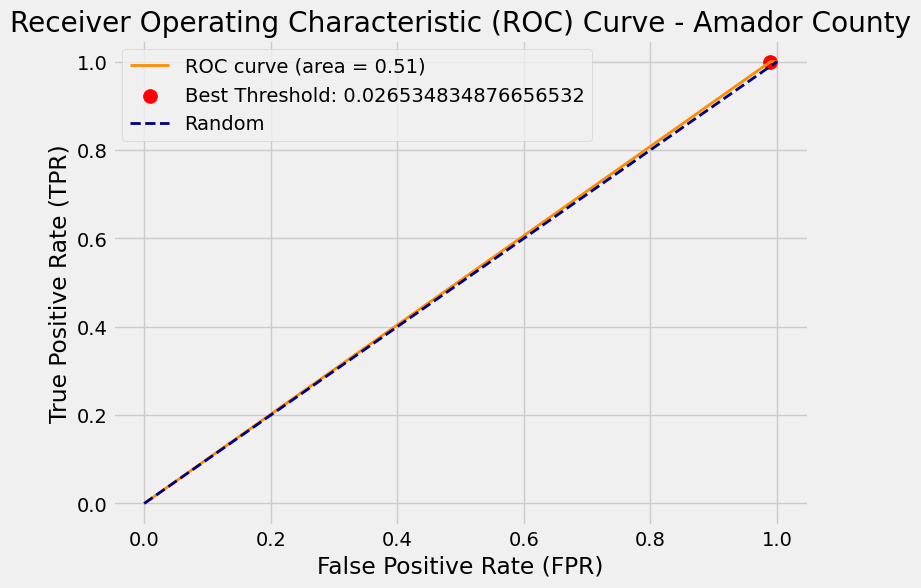

Accuracy Score: 0.9985422740524781
F-1 Score: 0.0
Confusion Matrix:
[[685   0]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       0.00      0.00      0.00         1

    accuracy                           1.00       686
   macro avg       0.50      0.50      0.50       686
weighted avg       1.00      1.00      1.00       686

Butte
22/22 [==============================] - 0s 562us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

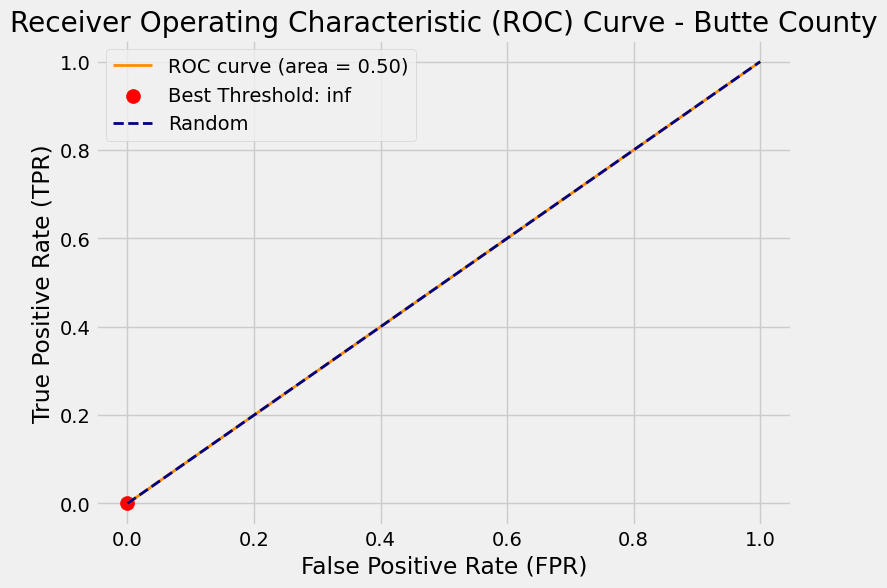

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Accuracy Score: 0.9517045454545454
F-1 Score: 0.0
Confusion Matrix:
[[670   0]
 [ 34   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       670
           1       0.00      0.00      0.00        34

    accuracy                           0.95       704
   macro avg       0.48      0.50      0.49       704
weighted avg       0.91      0.95      0.93       704

Colusa
22/22 [==============================] - 0s 579us/step


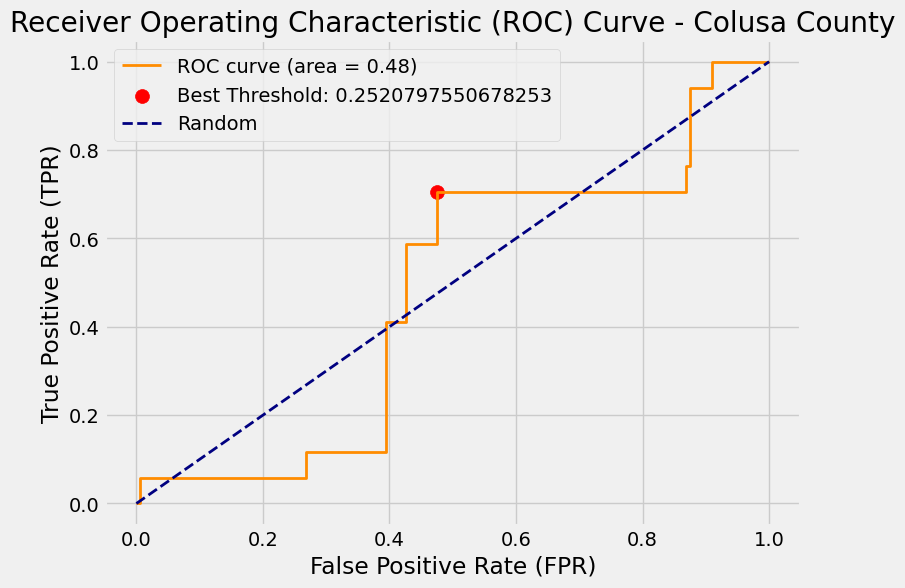

Accuracy Score: 0.527007299270073
F-1 Score: 0.058139534883720936
Confusion Matrix:
[[351 317]
 [  7  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.53      0.68       668
           1       0.03      0.59      0.06        17

    accuracy                           0.53       685
   macro avg       0.51      0.56      0.37       685
weighted avg       0.96      0.53      0.67       685

Contra Costa
22/22 [==============================] - 0s 554us/step


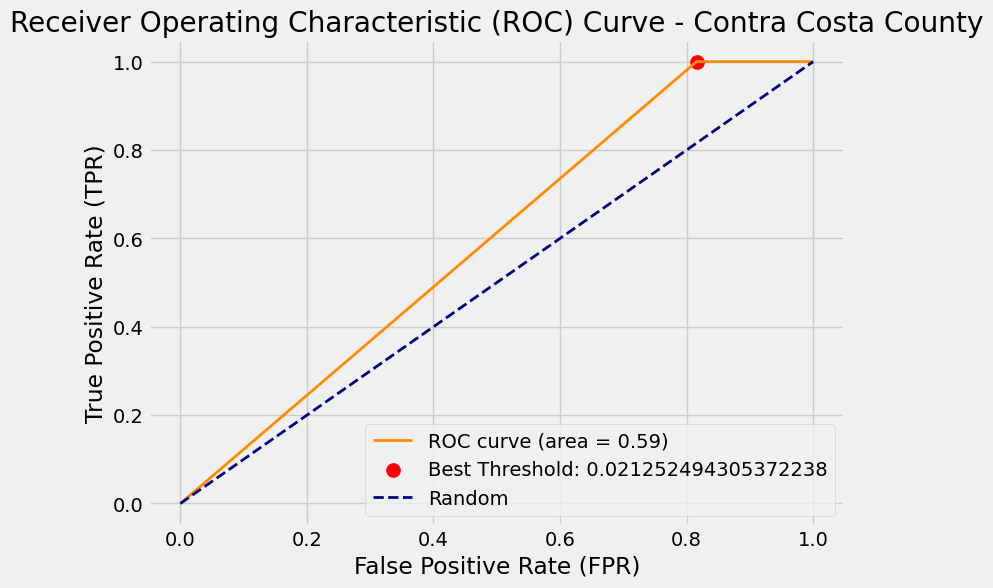

Accuracy Score: 0.9970845481049563
F-1 Score: 0.0
Confusion Matrix:
[[684   0]
 [  2   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684
           1       0.00      0.00      0.00         2

    accuracy                           1.00       686
   macro avg       0.50      0.50      0.50       686
weighted avg       0.99      1.00      1.00       686

Del Norte
22/22 [==============================] - 0s 542us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

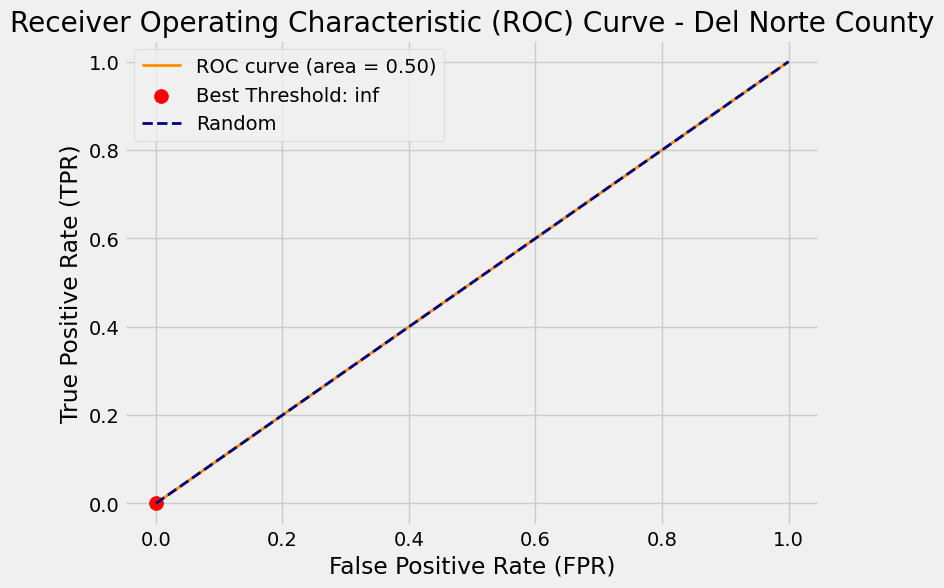

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Accuracy Score: 0.7448377581120944
F-1 Score: 0.0
Confusion Matrix:
[[505   0]
 [173   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       505
           1       0.00      0.00      0.00       173

    accuracy                           0.74       678
   macro avg       0.37      0.50      0.43       678
weighted avg       0.55      0.74      0.64       678

El Dorado
22/22 [==============================] - 0s 482us/step


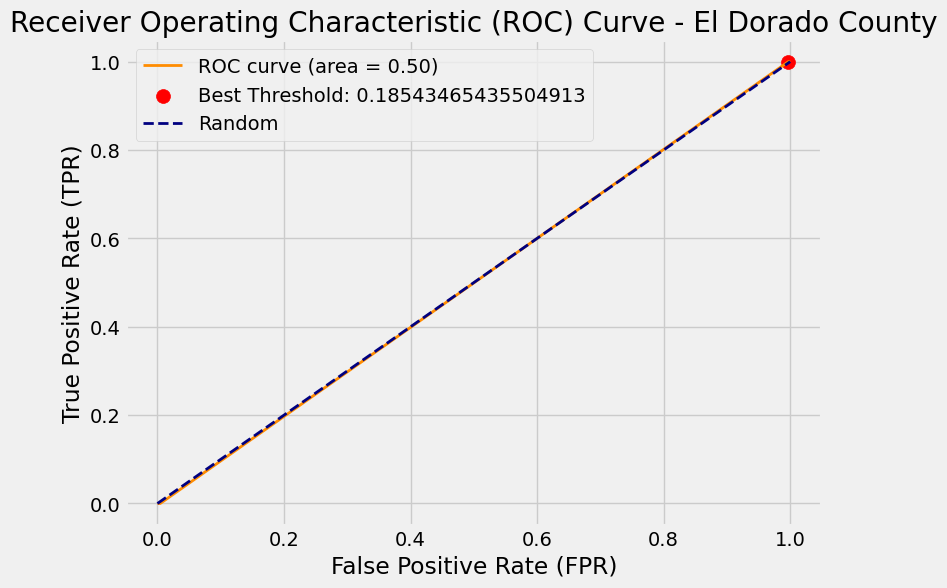

Accuracy Score: 0.9912536443148688
F-1 Score: 0.0
Confusion Matrix:
[[680   3]
 [  3   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.00      0.00      0.00         3

    accuracy                           0.99       686
   macro avg       0.50      0.50      0.50       686
weighted avg       0.99      0.99      0.99       686

Fresno
22/22 [==============================] - 0s 442us/step


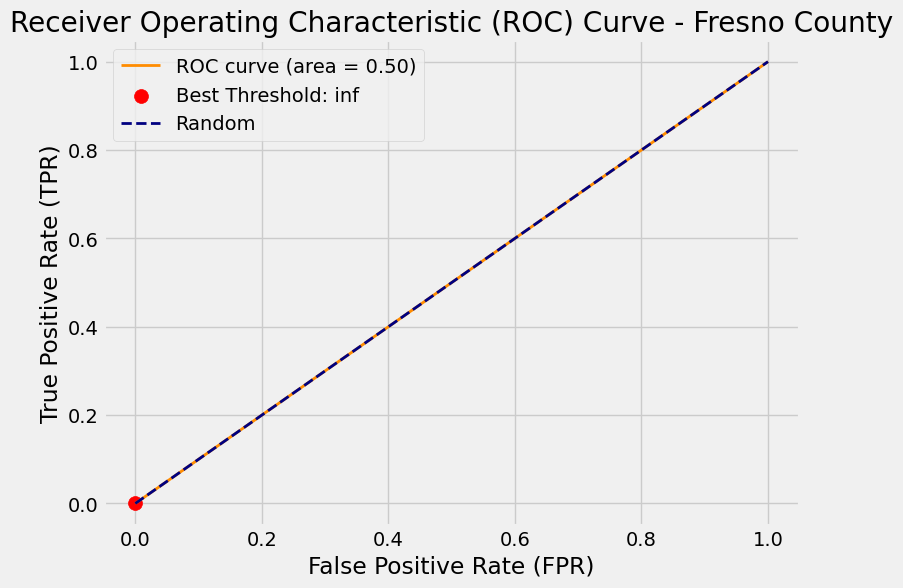

Accuracy Score: 0.9601139601139601
F-1 Score: 0.0
Confusion Matrix:
[[674   0]
 [ 28   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       674
           1       0.00      0.00      0.00        28

    accuracy                           0.96       702
   macro avg       0.48      0.50      0.49       702
weighted avg       0.92      0.96      0.94       702

Glenn
22/22 [==============================] - 0s 475us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

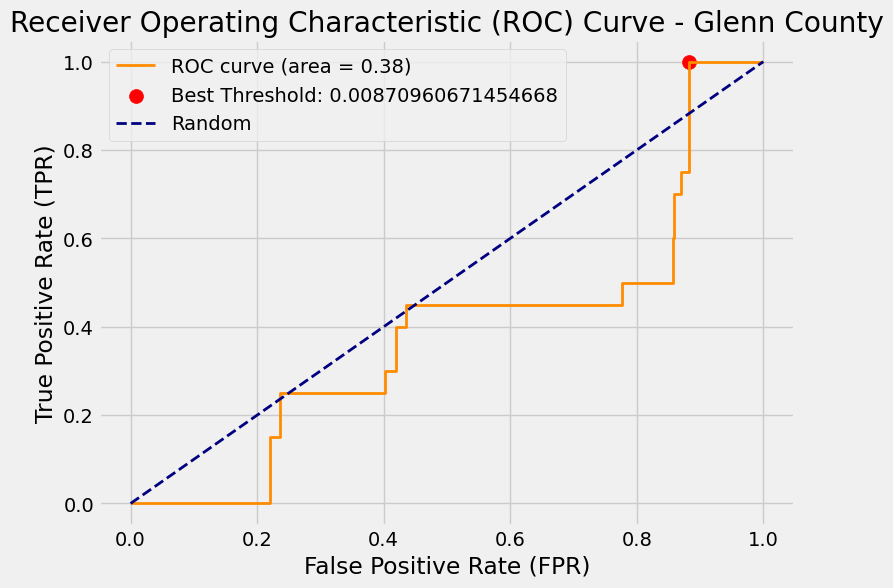

Accuracy Score: 0.13505747126436782
F-1 Score: 0.04746835443037975
Confusion Matrix:
[[ 79 597]
 [  5  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.12      0.21       676
           1       0.02      0.75      0.05        20

    accuracy                           0.14       696
   macro avg       0.48      0.43      0.13       696
weighted avg       0.91      0.14      0.20       696

Humboldt
22/22 [==============================] - 0s 567us/step


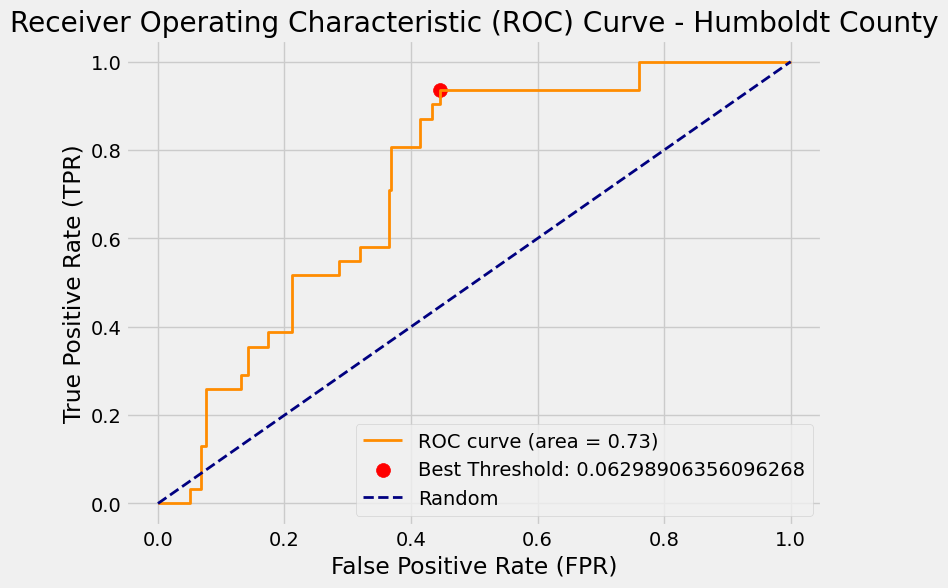

Accuracy Score: 0.5698005698005698
F-1 Score: 0.1564245810055866
Confusion Matrix:
[[372 299]
 [  3  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.55      0.71       671
           1       0.09      0.90      0.16        31

    accuracy                           0.57       702
   macro avg       0.54      0.73      0.43       702
weighted avg       0.95      0.57      0.69       702

Imperial
22/22 [==============================] - 0s 577us/step


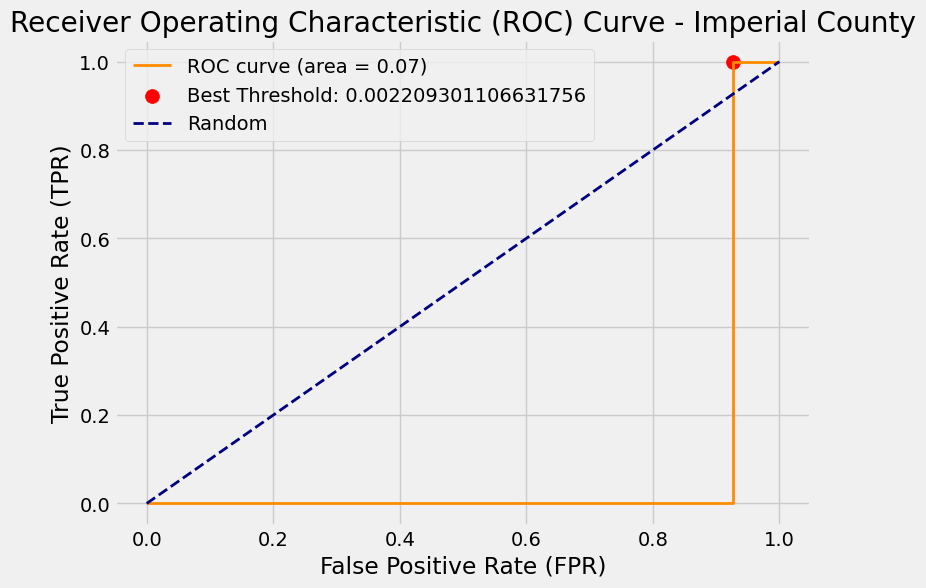

Accuracy Score: 0.0728862973760933
F-1 Score: 0.0
Confusion Matrix:
[[ 50 635]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.07      0.14       685
           1       0.00      0.00      0.00         1

    accuracy                           0.07       686
   macro avg       0.49      0.04      0.07       686
weighted avg       0.98      0.07      0.14       686

Inyo
22/22 [==============================] - 0s 469us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


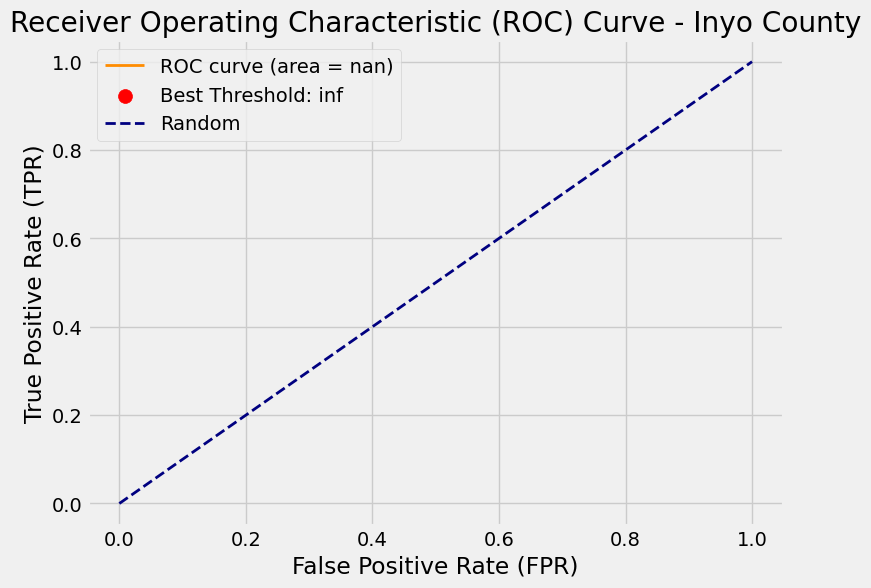

Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[685]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685

Kern


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


22/22 [==============================] - 0s 1ms/step


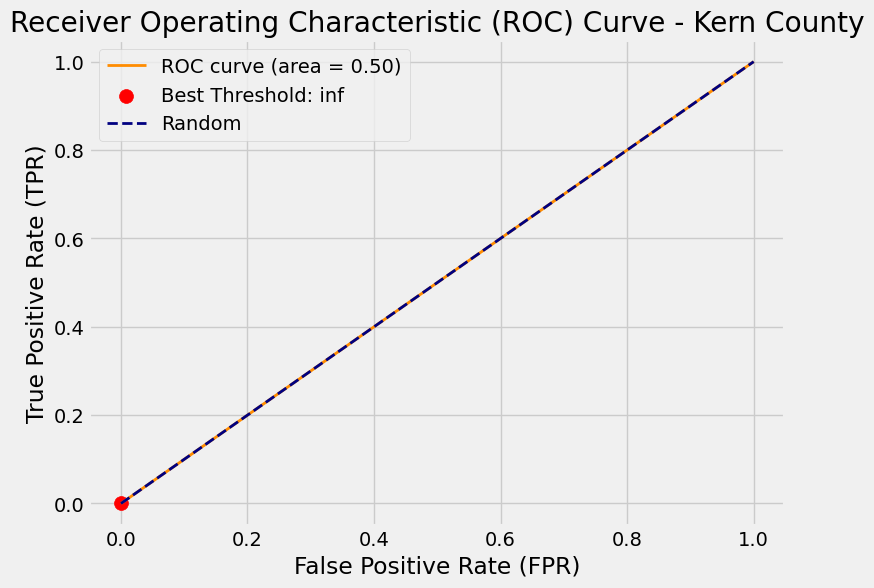

Accuracy Score: 0.9941775836972343
F-1 Score: 0.0
Confusion Matrix:
[[683   0]
 [  4   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       683
           1       0.00      0.00      0.00         4

    accuracy                           0.99       687
   macro avg       0.50      0.50      0.50       687
weighted avg       0.99      0.99      0.99       687

Kings
22/22 [==============================] - 0s 548us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

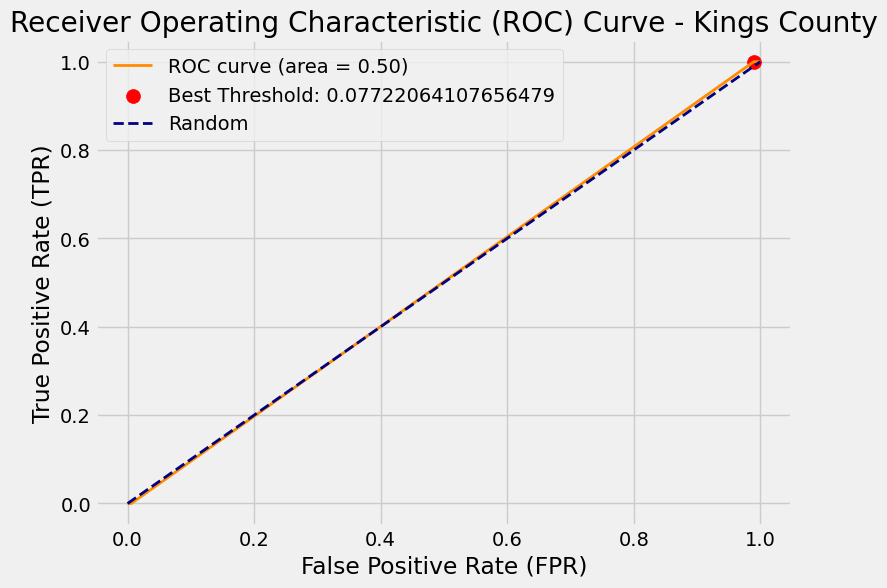

Accuracy Score: 0.9854651162790697
F-1 Score: 0.0
Confusion Matrix:
[[678   4]
 [  6   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       682
           1       0.00      0.00      0.00         6

    accuracy                           0.99       688
   macro avg       0.50      0.50      0.50       688
weighted avg       0.98      0.99      0.98       688

Lake
22/22 [==============================] - 0s 564us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


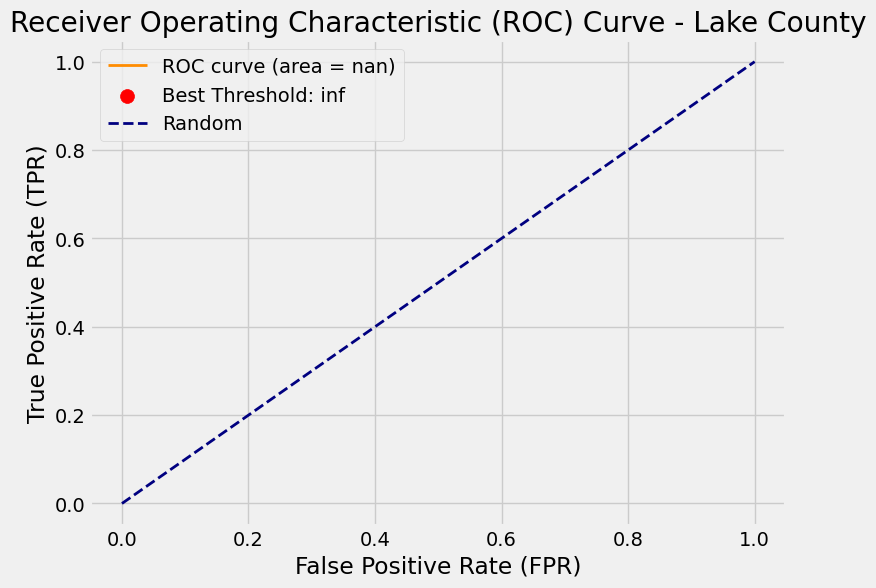

Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[685]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685

Lassen
22/22 [==============================] - 0s 552us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


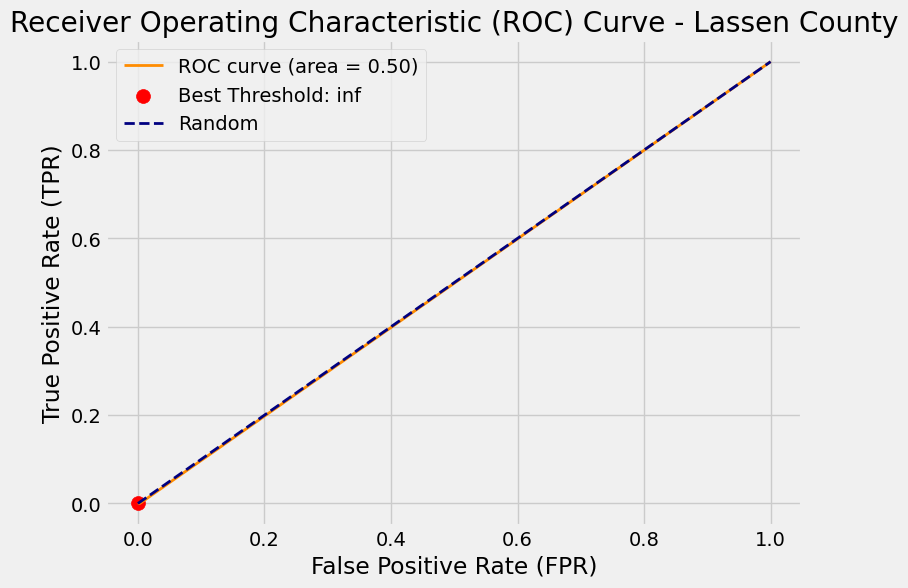

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Accuracy Score: 0.9985422740524781
F-1 Score: 0.0
Confusion Matrix:
[[685   0]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       0.00      0.00      0.00         1

    accuracy                           1.00       686
   macro avg       0.50      0.50      0.50       686
weighted avg       1.00      1.00      1.00       686

Los Angeles
22/22 [==============================] - 0s 475us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


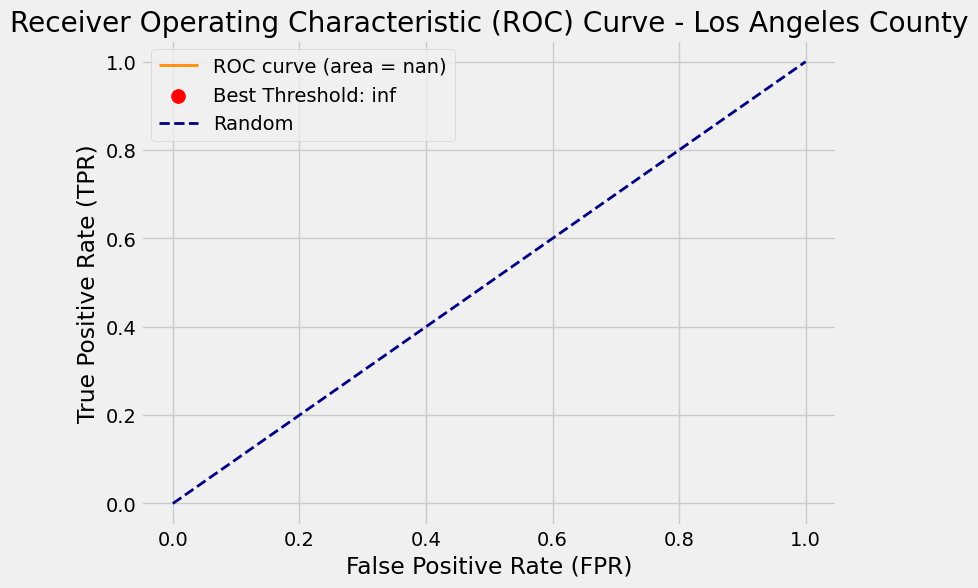

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[686]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       686

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Madera
22/22 [==============================] - 0s 483us/step


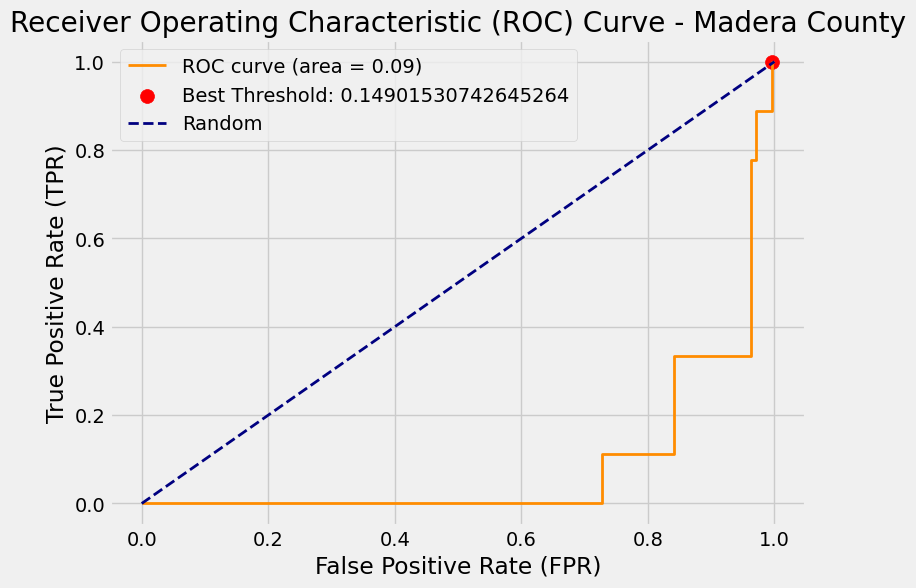

Accuracy Score: 0.015942028985507246
F-1 Score: 0.023021582733812954
Confusion Matrix:
[[  3 678]
 [  1   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.00      0.01       681
           1       0.01      0.89      0.02         9

    accuracy                           0.02       690
   macro avg       0.38      0.45      0.02       690
weighted avg       0.74      0.02      0.01       690

Marin
22/22 [==============================] - 0s 476us/step


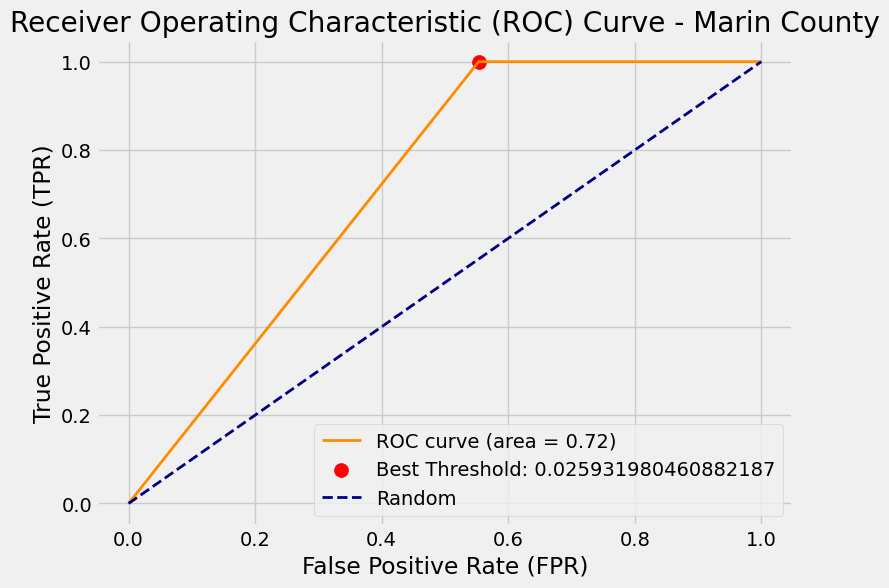

Accuracy Score: 0.9985422740524781
F-1 Score: 0.0
Confusion Matrix:
[[685   0]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       0.00      0.00      0.00         1

    accuracy                           1.00       686
   macro avg       0.50      0.50      0.50       686
weighted avg       1.00      1.00      1.00       686

Mariposa
22/22 [==============================] - 0s 579us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

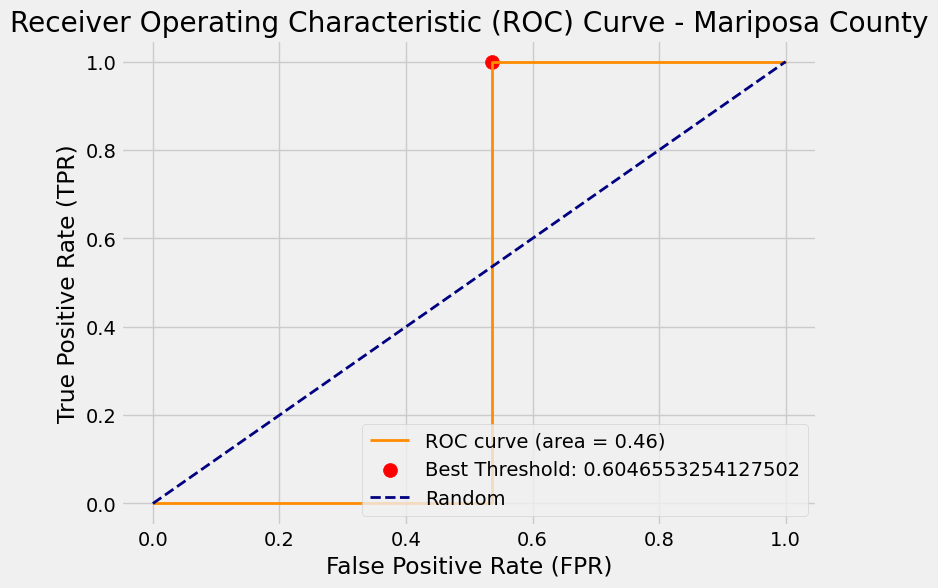

Accuracy Score: 0.4622093023255814
F-1 Score: 0.0
Confusion Matrix:
[[318 367]
 [  3   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.46      0.63       685
           1       0.00      0.00      0.00         3

    accuracy                           0.46       688
   macro avg       0.50      0.23      0.32       688
weighted avg       0.99      0.46      0.63       688

Mendocino
22/22 [==============================] - 0s 581us/step


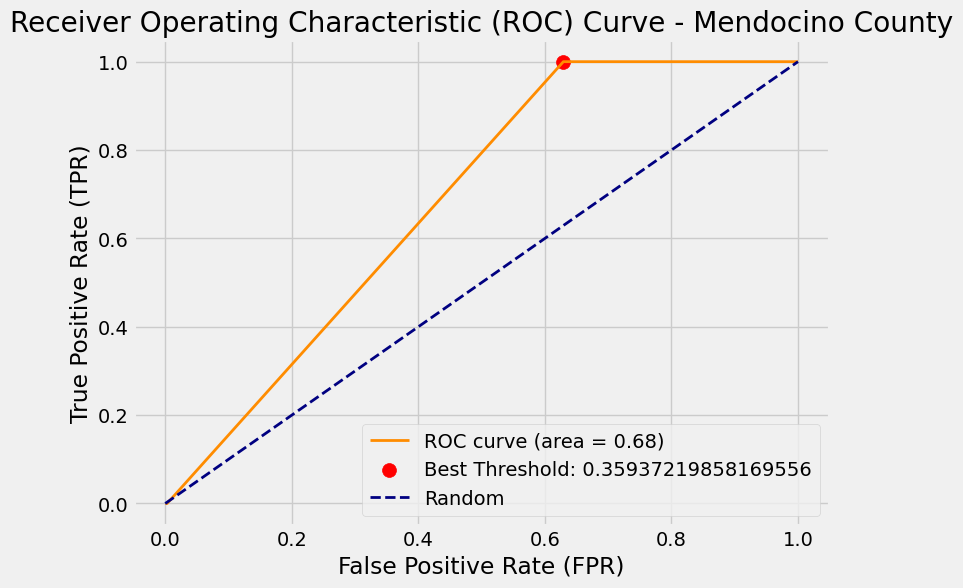

Accuracy Score: 0.9956268221574344
F-1 Score: 0.0
Confusion Matrix:
[[683   2]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       0.00      0.00      0.00         1

    accuracy                           1.00       686
   macro avg       0.50      0.50      0.50       686
weighted avg       1.00      1.00      1.00       686

Merced
22/22 [==============================] - 0s 476us/step


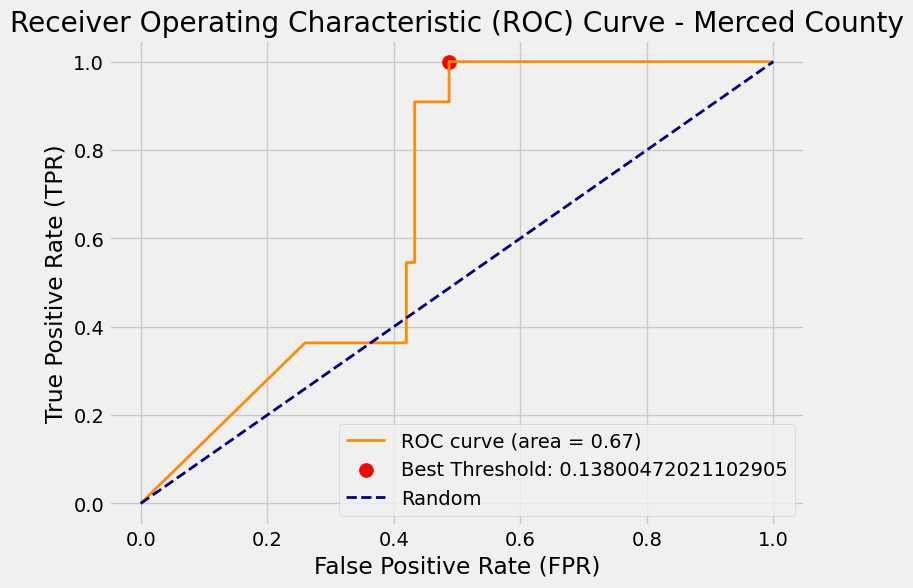

Accuracy Score: 0.5187861271676301
F-1 Score: 0.05665722379603399
Confusion Matrix:
[[349 332]
 [  1  10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.51      0.68       681
           1       0.03      0.91      0.06        11

    accuracy                           0.52       692
   macro avg       0.51      0.71      0.37       692
weighted avg       0.98      0.52      0.67       692

Modoc
22/22 [==============================] - 0s 1ms/step


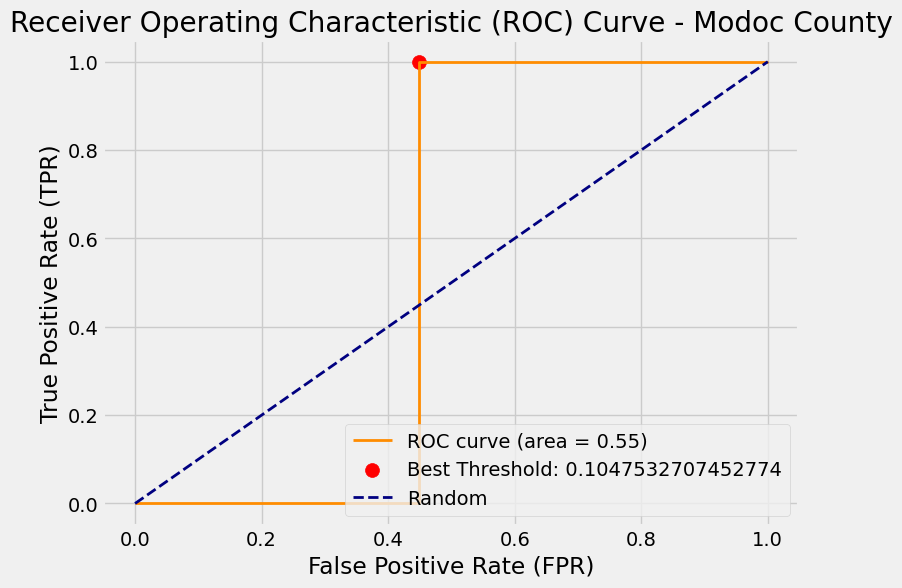

Accuracy Score: 0.5502183406113537
F-1 Score: 0.0
Confusion Matrix:
[[378 307]
 [  2   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.55      0.71       685
           1       0.00      0.00      0.00         2

    accuracy                           0.55       687
   macro avg       0.50      0.28      0.35       687
weighted avg       0.99      0.55      0.71       687

Mono
22/22 [==============================] - 0s 516us/step


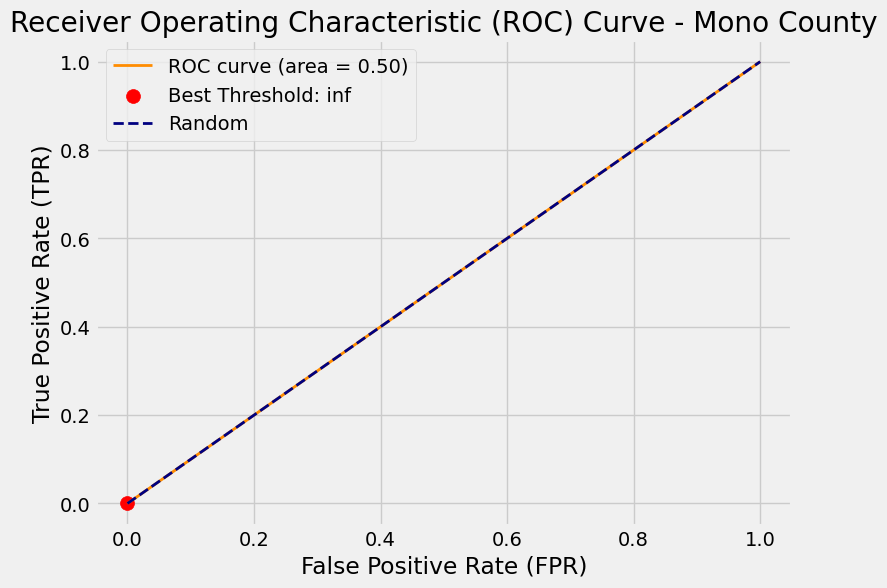

Accuracy Score: 0.9956331877729258
F-1 Score: 0.0
Confusion Matrix:
[[684   0]
 [  3   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684
           1       0.00      0.00      0.00         3

    accuracy                           1.00       687
   macro avg       0.50      0.50      0.50       687
weighted avg       0.99      1.00      0.99       687

Monterey
22/22 [==============================] - 0s 489us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

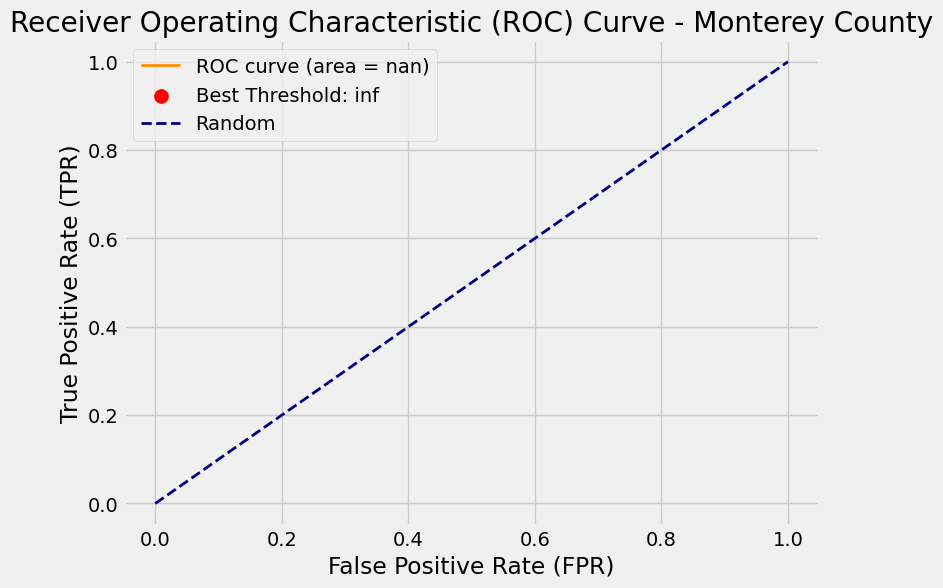

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[686]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       686

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Nevada
22/22 [==============================] - 0s 442us/step


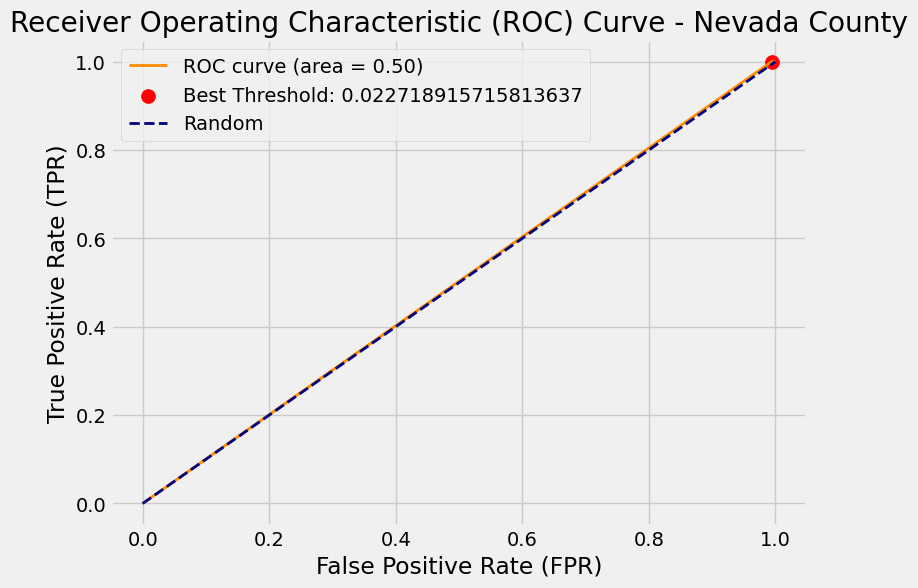

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Accuracy Score: 0.9956331877729258
F-1 Score: 0.0
Confusion Matrix:
[[684   0]
 [  3   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684
           1       0.00      0.00      0.00         3

    accuracy                           1.00       687
   macro avg       0.50      0.50      0.50       687
weighted avg       0.99      1.00      0.99       687

Orange
22/22 [==============================] - 0s 565us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


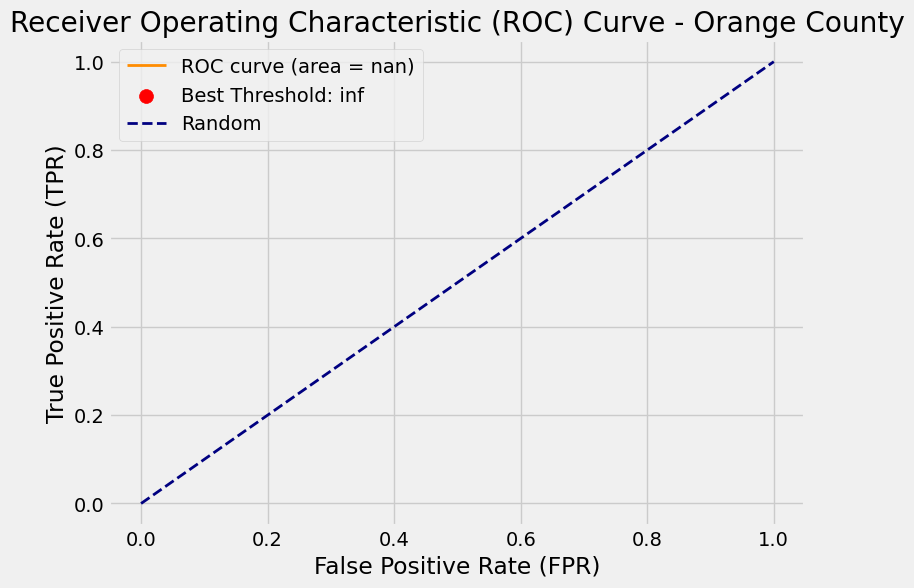

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[684]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       684

    accuracy                           1.00       684
   macro avg       1.00      1.00      1.00       684
weighted avg       1.00      1.00      1.00       684

Placer
22/22 [==============================] - 0s 497us/step


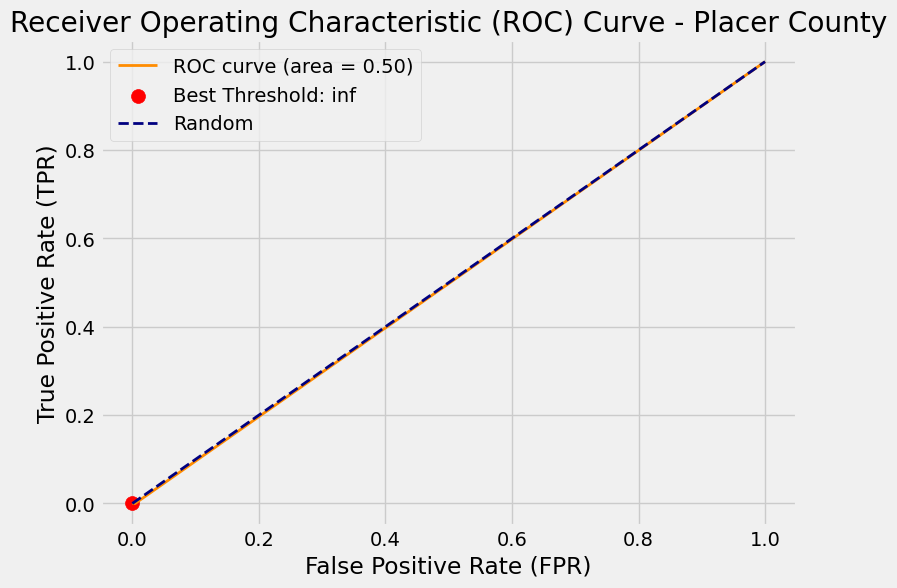

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Accuracy Score: 0.9841269841269841
F-1 Score: 0.0
Confusion Matrix:
[[682   0]
 [ 11   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       682
           1       0.00      0.00      0.00        11

    accuracy                           0.98       693
   macro avg       0.49      0.50      0.50       693
weighted avg       0.97      0.98      0.98       693

Plumas
22/22 [==============================] - 0s 551us/step


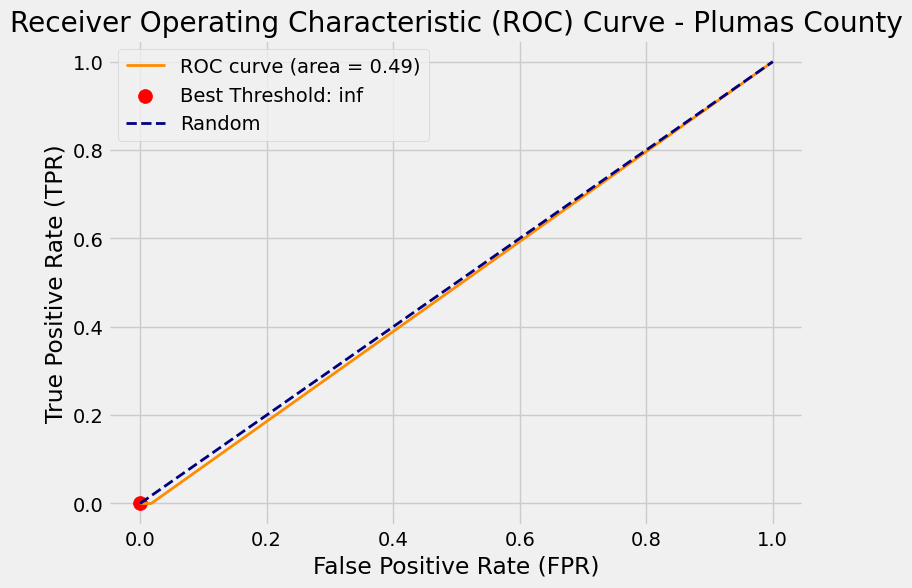

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Accuracy Score: 0.9912663755458515
F-1 Score: 0.0
Confusion Matrix:
[[681   0]
 [  6   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       681
           1       0.00      0.00      0.00         6

    accuracy                           0.99       687
   macro avg       0.50      0.50      0.50       687
weighted avg       0.98      0.99      0.99       687

Riverside
22/22 [==============================] - 0s 547us/step


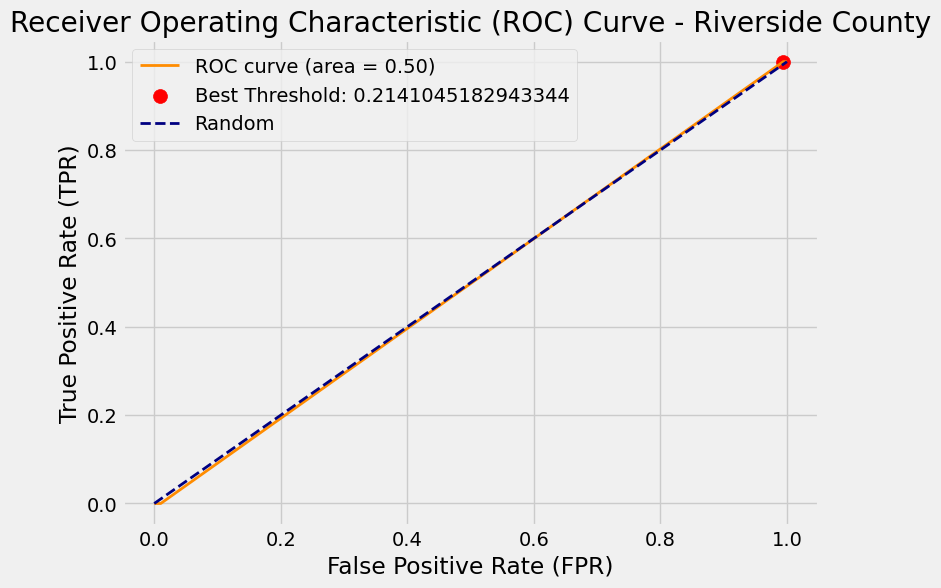

Accuracy Score: 0.9883381924198251
F-1 Score: 0.0
Confusion Matrix:
[[678   7]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       685
           1       0.00      0.00      0.00         1

    accuracy                           0.99       686
   macro avg       0.50      0.49      0.50       686
weighted avg       1.00      0.99      0.99       686

Sacramento
22/22 [==============================] - 0s 500us/step


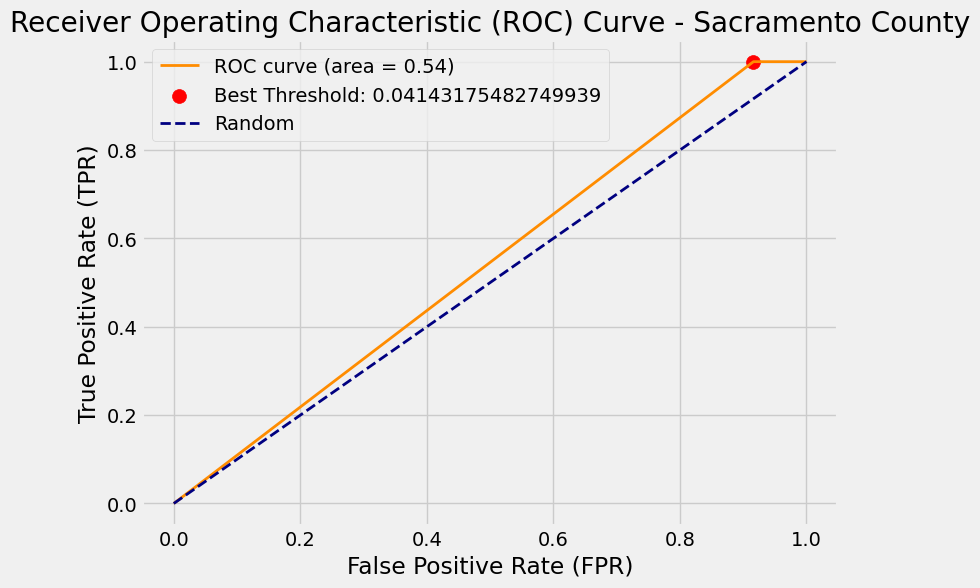

Accuracy Score: 0.9798270893371758
F-1 Score: 0.0
Confusion Matrix:
[[680   0]
 [ 14   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       680
           1       0.00      0.00      0.00        14

    accuracy                           0.98       694
   macro avg       0.49      0.50      0.49       694
weighted avg       0.96      0.98      0.97       694

San Benito
22/22 [==============================] - 0s 480us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

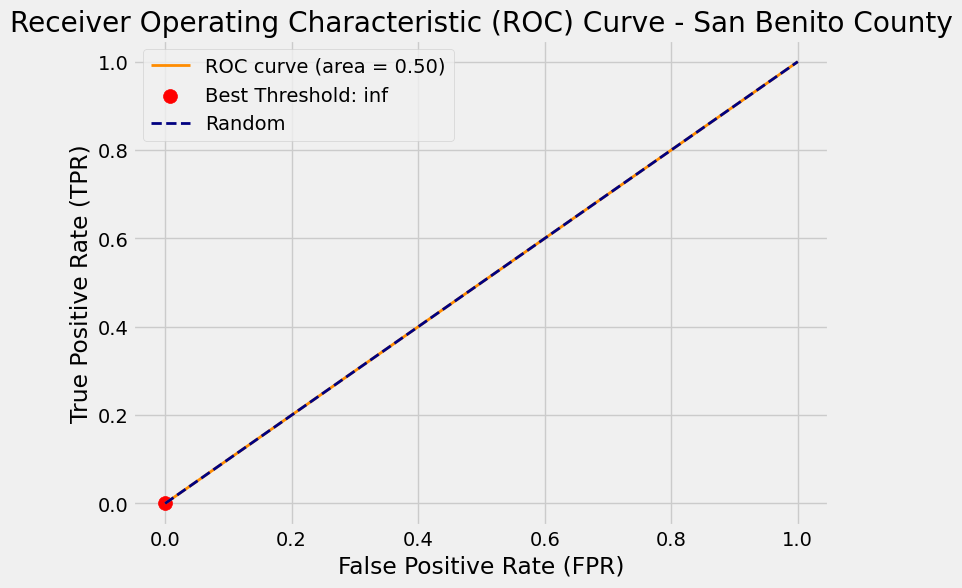

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Accuracy Score: 0.997080291970803
F-1 Score: 0.0
Confusion Matrix:
[[683   0]
 [  2   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.00      0.00      0.00         2

    accuracy                           1.00       685
   macro avg       0.50      0.50      0.50       685
weighted avg       0.99      1.00      1.00       685

San Bernardino
22/22 [==============================] - 0s 491us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


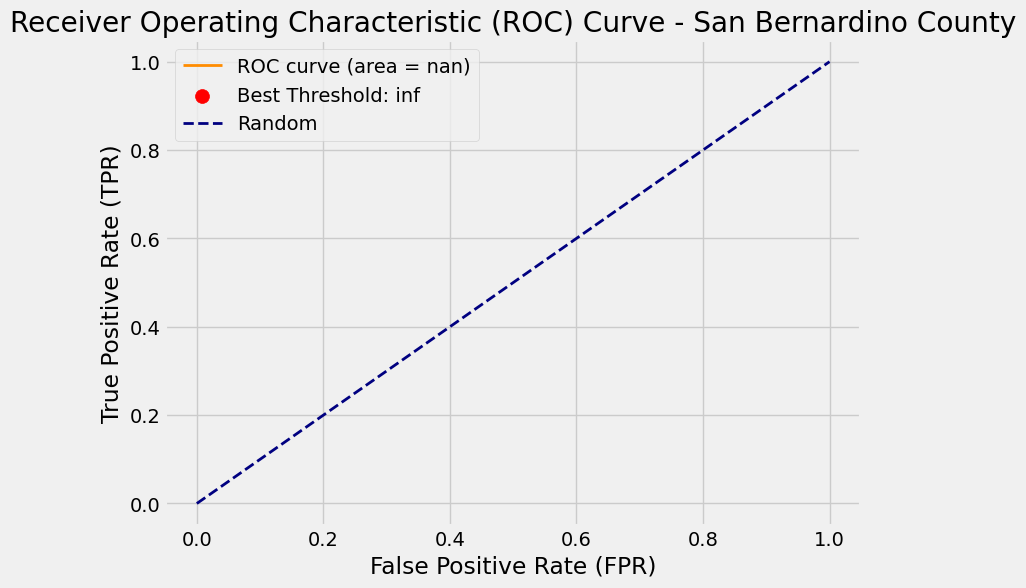

Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[686]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       686

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

San Diego


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


22/22 [==============================] - 0s 496us/step


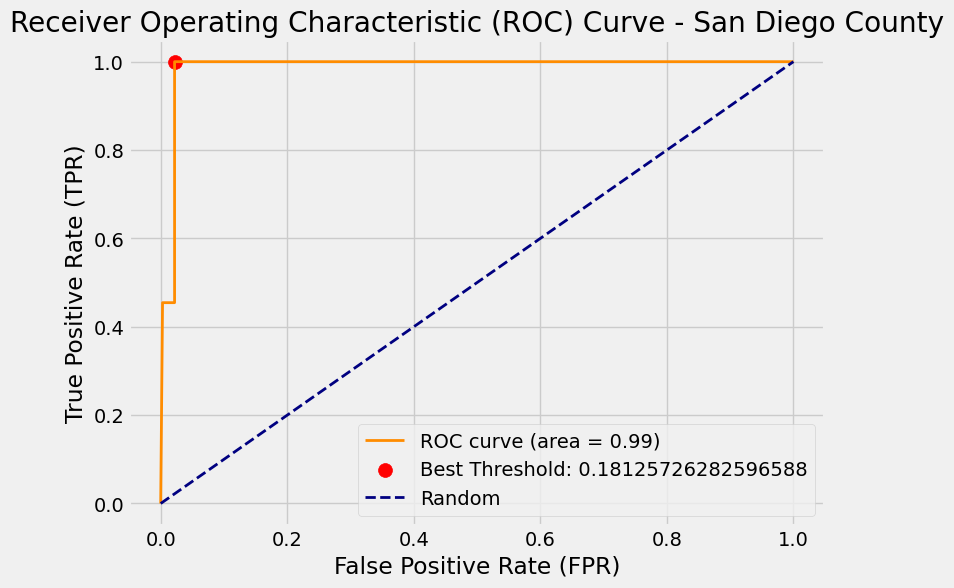

Accuracy Score: 0.9697841726618706
F-1 Score: 0.3225806451612903
Confusion Matrix:
[[669  15]
 [  6   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       684
           1       0.25      0.45      0.32        11

    accuracy                           0.97       695
   macro avg       0.62      0.72      0.65       695
weighted avg       0.98      0.97      0.97       695

San Joaquin
22/22 [==============================] - 0s 513us/step


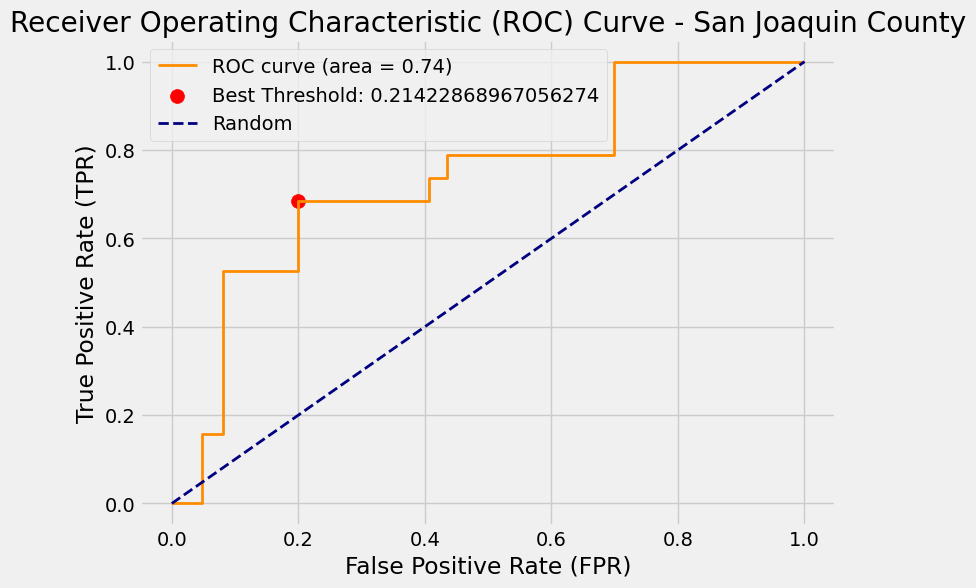

Accuracy Score: 0.793400286944046
F-1 Score: 0.1219512195121951
Confusion Matrix:
[[543 135]
 [  9  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       678
           1       0.07      0.53      0.12        19

    accuracy                           0.79       697
   macro avg       0.53      0.66      0.50       697
weighted avg       0.96      0.79      0.86       697

San Luis Obispo
22/22 [==============================] - 0s 519us/step


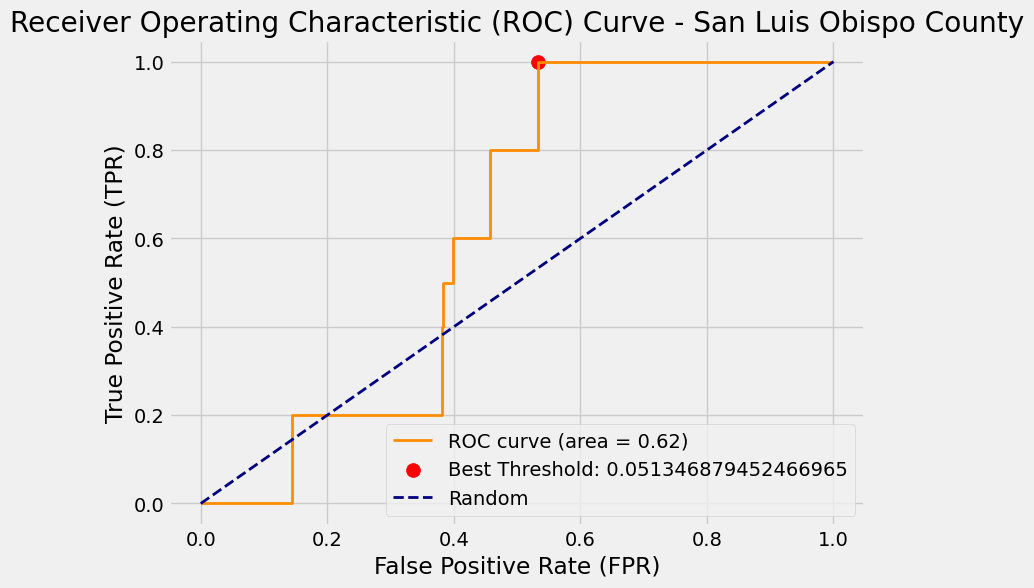

Accuracy Score: 0.47246376811594204
F-1 Score: 0.042105263157894736
Confusion Matrix:
[[318 362]
 [  2   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.47      0.64       680
           1       0.02      0.80      0.04        10

    accuracy                           0.47       690
   macro avg       0.51      0.63      0.34       690
weighted avg       0.98      0.47      0.63       690

San Mateo
22/22 [==============================] - 0s 476us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


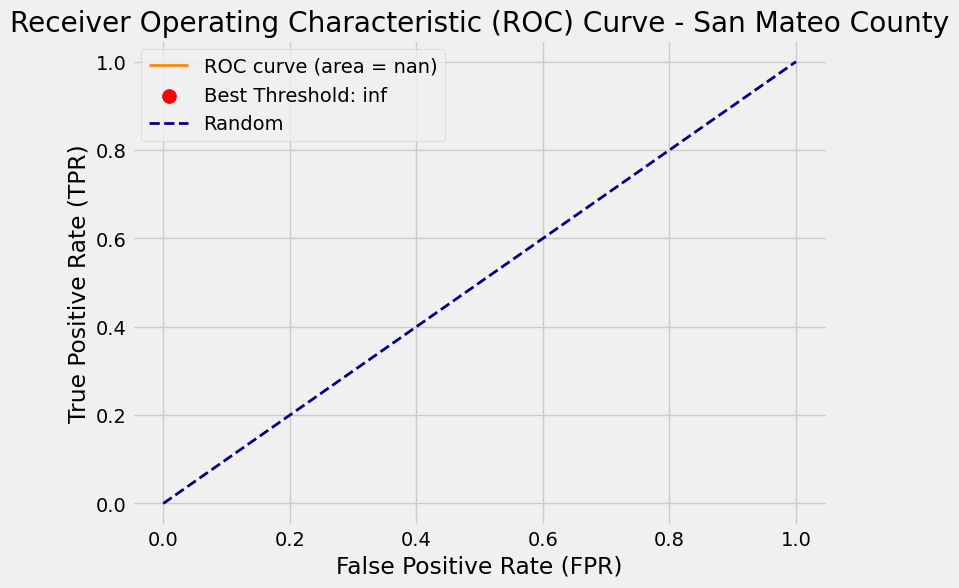

Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[685]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685

Santa Barbara
22/22 [==============================] - 0s 488us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


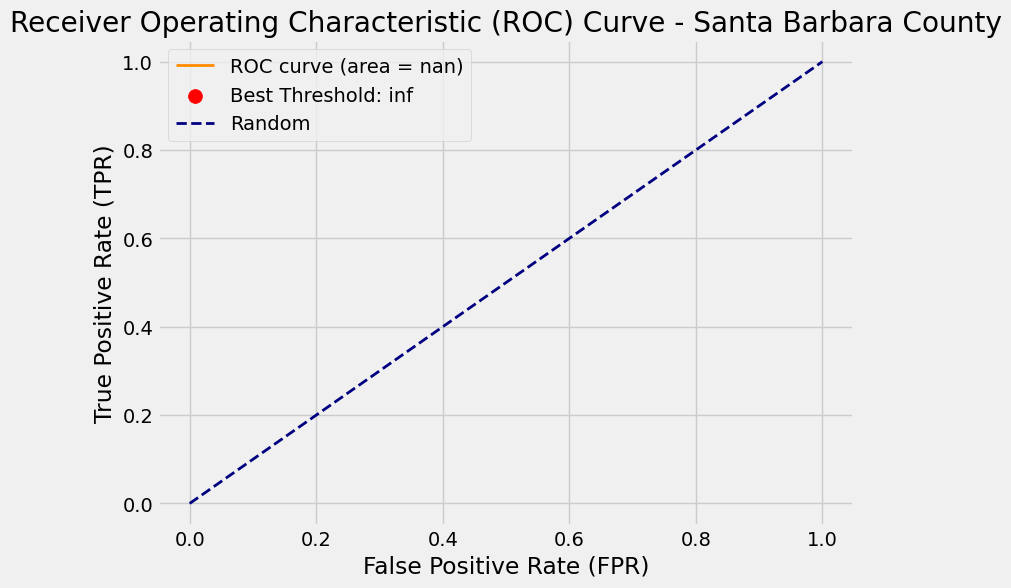

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[685]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685

Santa Clara
22/22 [==============================] - 0s 474us/step


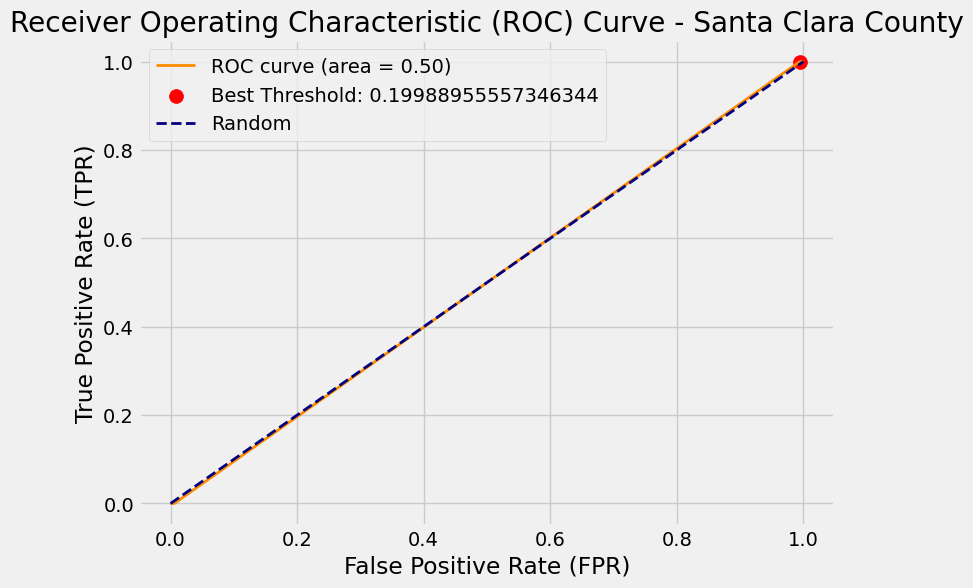

Accuracy Score: 0.9927113702623906
F-1 Score: 0.0
Confusion Matrix:
[[681   4]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       685
           1       0.00      0.00      0.00         1

    accuracy                           0.99       686
   macro avg       0.50      0.50      0.50       686
weighted avg       1.00      0.99      0.99       686

Santa Cruz
22/22 [==============================] - 0s 491us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


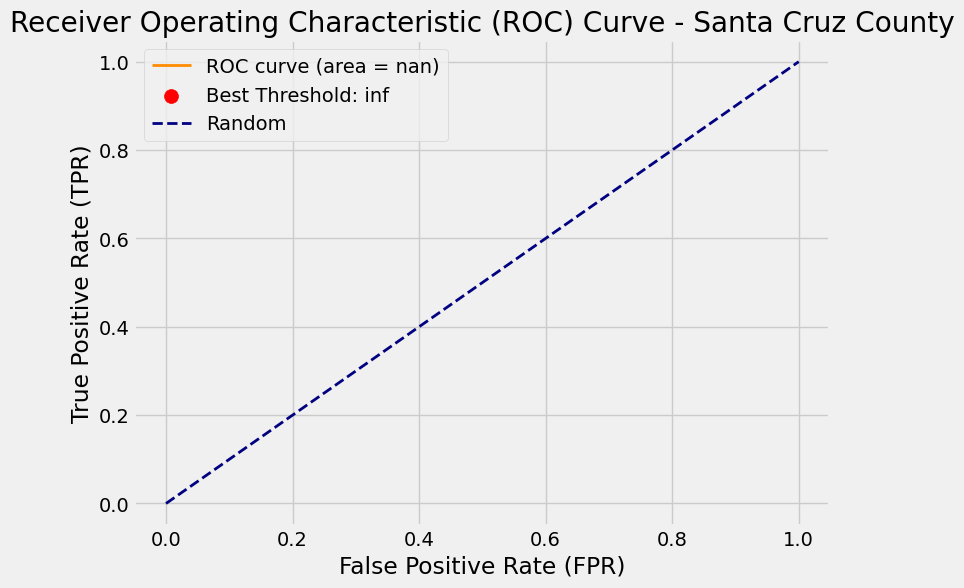

Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[686]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       686

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Shasta
 1/22 [>.............................] - ETA: 1s

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


22/22 [==============================] - 0s 2ms/step


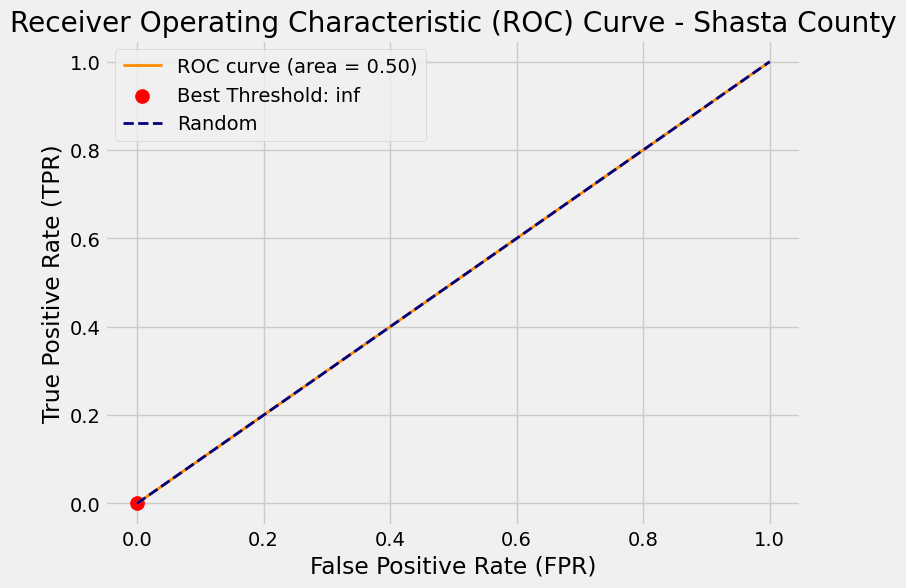

Accuracy Score: 0.9869753979739508
F-1 Score: 0.0
Confusion Matrix:
[[682   0]
 [  9   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       682
           1       0.00      0.00      0.00         9

    accuracy                           0.99       691
   macro avg       0.49      0.50      0.50       691
weighted avg       0.97      0.99      0.98       691

Sierra
22/22 [==============================] - 0s 478us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

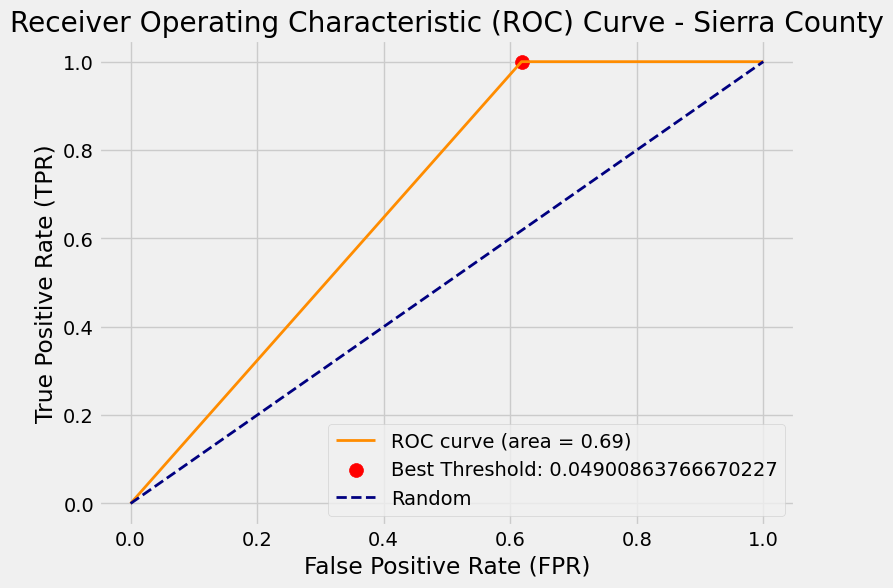

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Accuracy Score: 0.9941775836972343
F-1 Score: 0.0
Confusion Matrix:
[[683   0]
 [  4   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       683
           1       0.00      0.00      0.00         4

    accuracy                           0.99       687
   macro avg       0.50      0.50      0.50       687
weighted avg       0.99      0.99      0.99       687

Siskiyou
29/29 [==============================] - 0s 458us/step


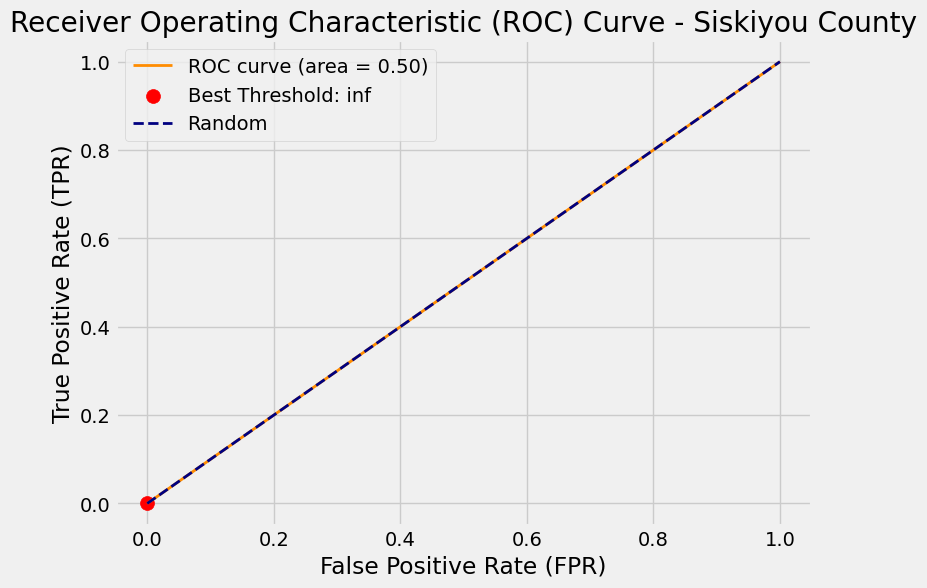

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

Accuracy Score: 0.7331118493909191
F-1 Score: 0.0
Confusion Matrix:
[[662   0]
 [241   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       662
           1       0.00      0.00      0.00       241

    accuracy                           0.73       903
   macro avg       0.37      0.50      0.42       903
weighted avg       0.54      0.73      0.62       903

Sonoma
22/22 [==============================] - 0s 466us/step


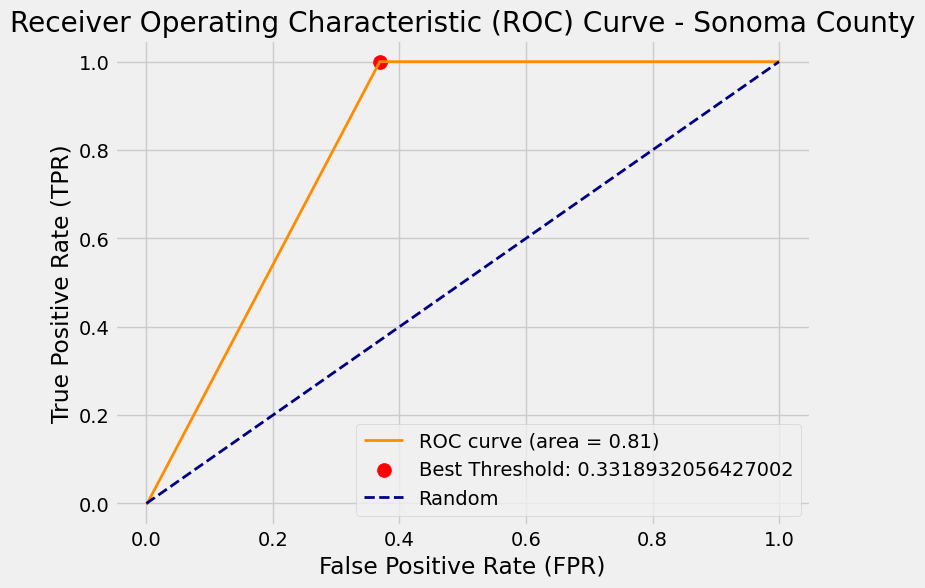

Accuracy Score: 0.9956204379562044
F-1 Score: 0.0
Confusion Matrix:
[[682   1]
 [  2   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       683
           1       0.00      0.00      0.00         2

    accuracy                           1.00       685
   macro avg       0.50      0.50      0.50       685
weighted avg       0.99      1.00      0.99       685

Stanislaus
19/19 [==============================] - 0s 522us/step


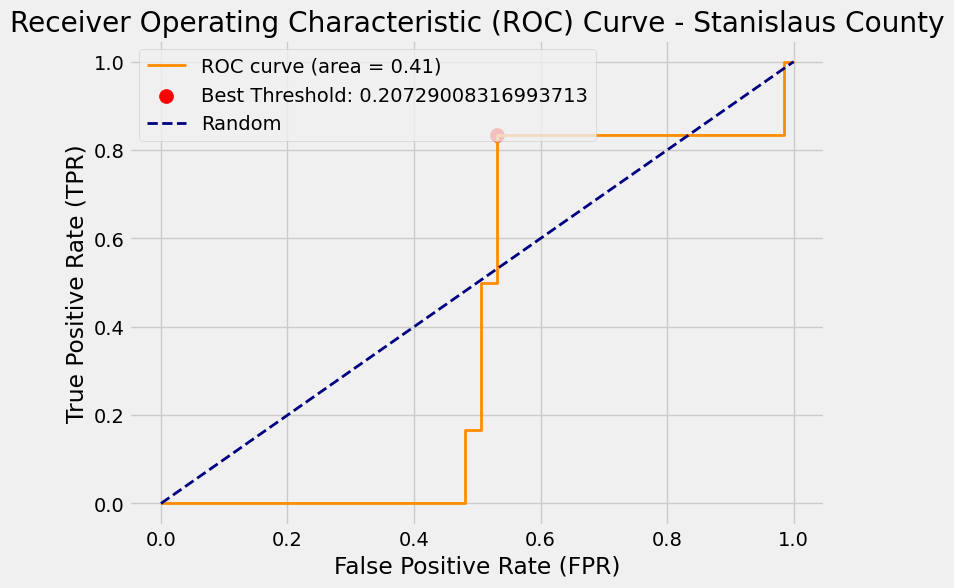

Accuracy Score: 0.4688026981450253
F-1 Score: 0.01869158878504673
Confusion Matrix:
[[275 312]
 [  3   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.47      0.64       587
           1       0.01      0.50      0.02         6

    accuracy                           0.47       593
   macro avg       0.50      0.48      0.33       593
weighted avg       0.98      0.47      0.63       593

Tehama
22/22 [==============================] - 0s 489us/step


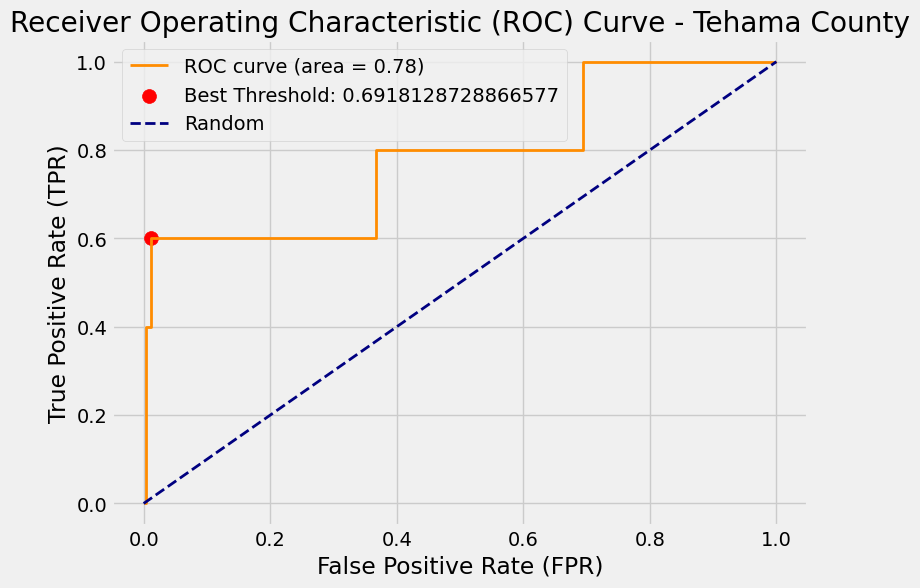

Accuracy Score: 0.9839650145772595
F-1 Score: 0.26666666666666666
Confusion Matrix:
[[673   8]
 [  3   2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       681
           1       0.20      0.40      0.27         5

    accuracy                           0.98       686
   macro avg       0.60      0.69      0.63       686
weighted avg       0.99      0.98      0.99       686

Trinity
22/22 [==============================] - 0s 451us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


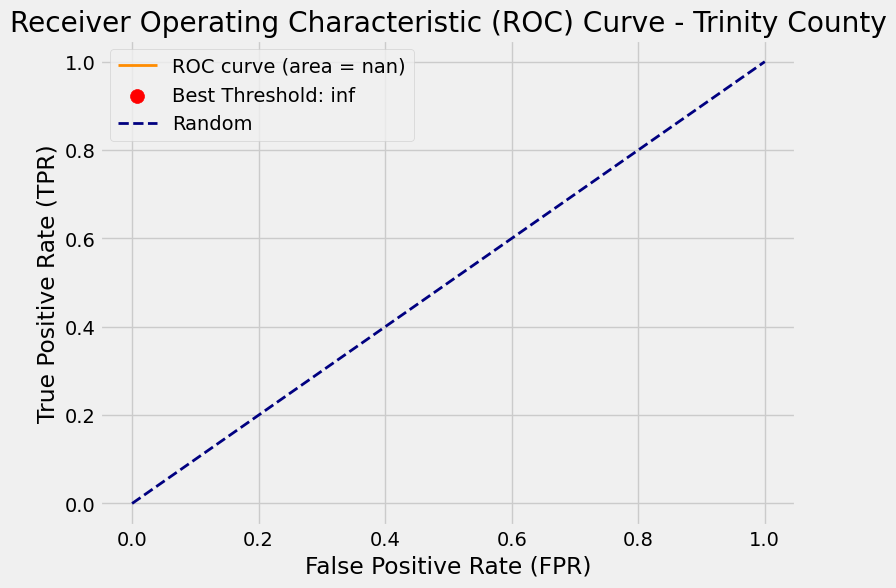

Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[686]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       686

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Tulare
23/23 [==============================] - 0s 443us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


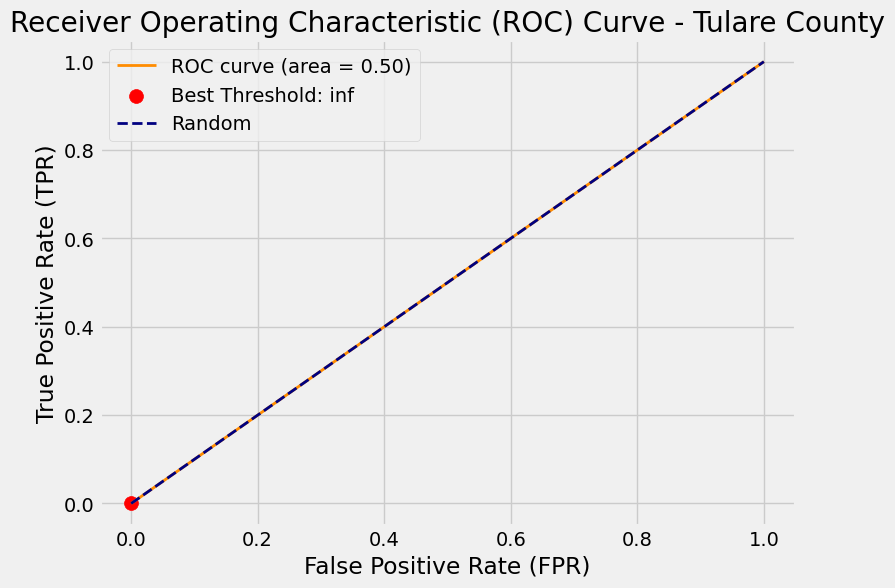

Accuracy Score: 0.9353932584269663
F-1 Score: 0.0
Confusion Matrix:
[[666   0]
 [ 46   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       666
           1       0.00      0.00      0.00        46

    accuracy                           0.94       712
   macro avg       0.47      0.50      0.48       712
weighted avg       0.87      0.94      0.90       712

Tuolumne
24/24 [==============================] - 0s 491us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

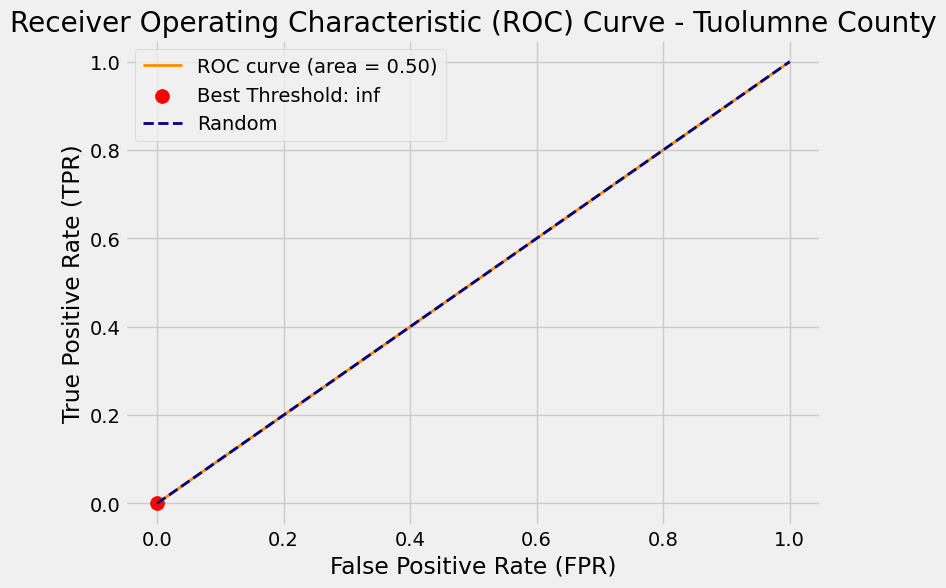

Accuracy Score: 0.8793103448275862
F-1 Score: 0.0
Confusion Matrix:
[[663   0]
 [ 91   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       663
           1       0.00      0.00      0.00        91

    accuracy                           0.88       754
   macro avg       0.44      0.50      0.47       754
weighted avg       0.77      0.88      0.82       754

Ventura
22/22 [==============================] - 0s 450us/step


/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

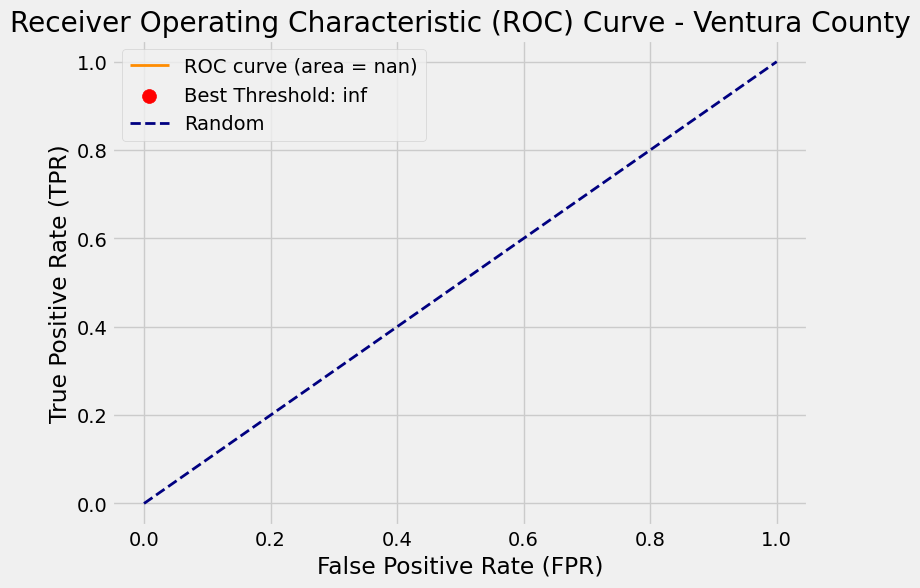

/Users/welpp/Desktop/Advanced Applied Computing/Machine/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


Accuracy Score: 1.0
F-1 Score: 0.0
Confusion Matrix:
[[686]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       686

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Yolo
22/22 [==============================] - 0s 452us/step


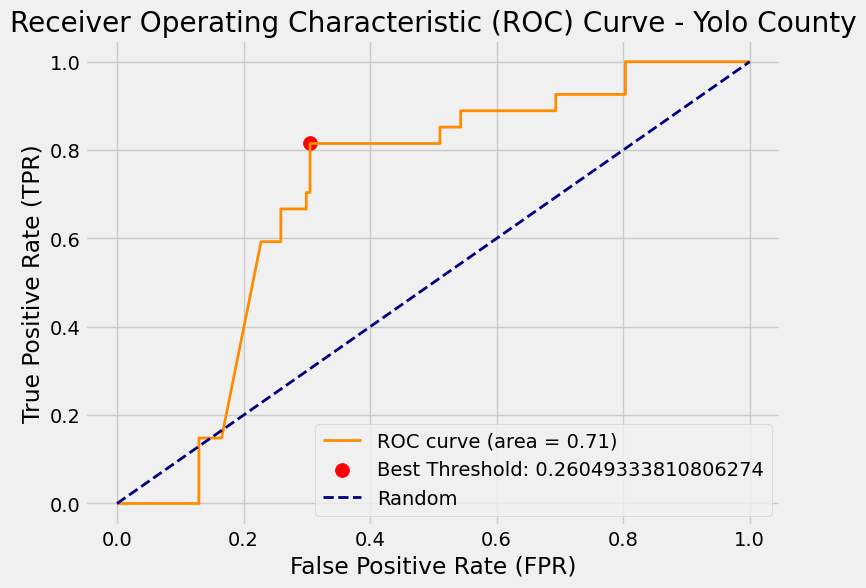

Accuracy Score: 0.6952789699570815
F-1 Score: 0.15139442231075698
Confusion Matrix:
[[467 205]
 [  8  19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       672
           1       0.08      0.70      0.15        27

    accuracy                           0.70       699
   macro avg       0.53      0.70      0.48       699
weighted avg       0.95      0.70      0.79       699

Yuba
22/22 [==============================] - 0s 458us/step


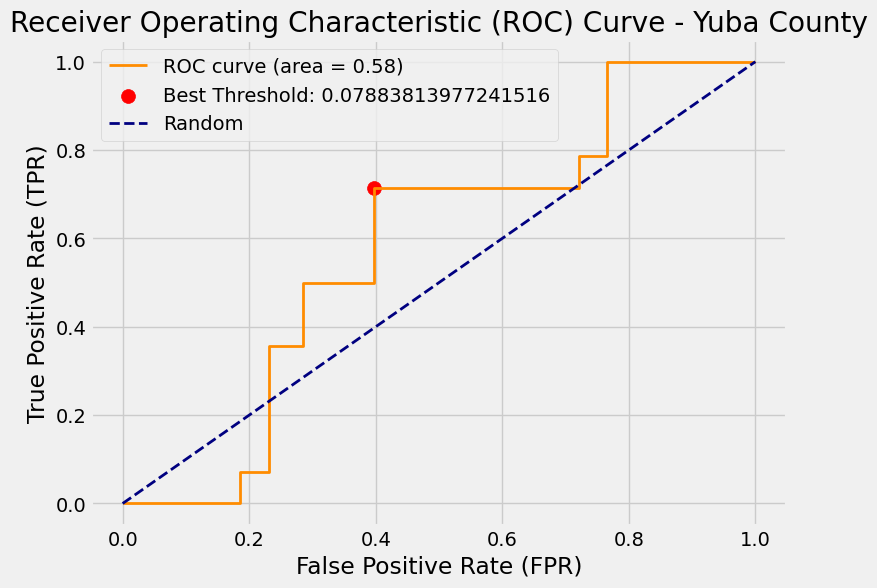

Accuracy Score: 0.6005788712011577
F-1 Score: 0.048275862068965524
Confusion Matrix:
[[408 269]
 [  7   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.60      0.75       677
           1       0.03      0.50      0.05        14

    accuracy                           0.60       691
   macro avg       0.50      0.55      0.40       691
weighted avg       0.96      0.60      0.73       691



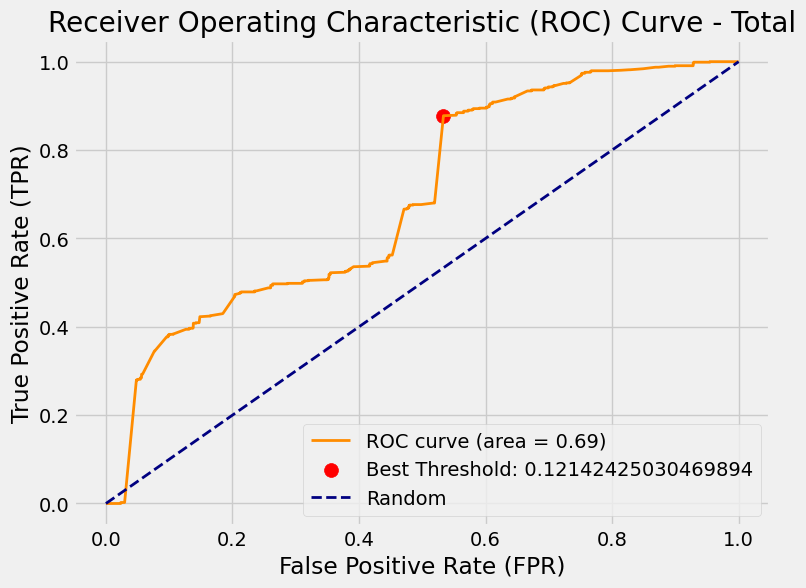

Accuracy Score: 0.4853950953678474
F-1 Score: 0.05927475592747559
Confusion Matrix:
[[17219 18606]
 [  280   595]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.48      0.65     35825
           1       0.03      0.68      0.06       875

    accuracy                           0.49     36700
   macro avg       0.51      0.58      0.35     36700
weighted avg       0.96      0.49      0.63     36700



In [344]:
all_county_results = {}

y_pred_total = []
y_test_total = []

# Loop through each county and apply ROC curve analysis
for county, model in all_county_models.items():
    if county not in scaled_county_dfs:
        print(f"Data not available for {county} County.")
        continue
    else:
        print(county)

    formatted_data = scaled_county_dfs[county]
    X_test_format = formatted_data['X_test_scaled']
    y_test_format = formatted_data['y_test']

    # Predictions
    y_pred = model.predict(X_test_format)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_format, y_pred)
    roc_auc = auc(fpr, tpr)

    # Find the best threshold using Youden's J statistic
    youden_j = tpr - fpr
    best_threshold_index = np.argmax(youden_j)
    best_threshold = thresholds[best_threshold_index]

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold: {best_threshold}', s=100, marker='o')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {county} County')
    plt.legend()
    plt.show()

    # Convert predictions to binary using the best threshold
    y_pred_binary = (y_pred > best_threshold).astype(int)

    y_pred_total.extend(y_pred)
    y_test_total.extend(y_test_format)

    # Calculate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test_format, y_pred_binary)
    classification_rep = classification_report(y_test_format, y_pred_binary)
    accuracy = accuracy_score(y_test_format, y_pred_binary)
    f1 = f1_score(y_test_format, y_pred_binary)

    # Store results in the dictionary
    all_county_results[county] = {
        'roc_auc': roc_auc,
        'best_threshold': best_threshold,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_rep
    }

    print(f"Accuracy Score: {accuracy}")
    print(f"F-1 Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_rep)

## For overall
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_total, y_pred_total)
roc_auc = auc(fpr, tpr)

# Find the best threshold using Youden's J statistic
youden_j = tpr - fpr
best_threshold_index = np.argmax(youden_j)
best_threshold = thresholds[best_threshold_index]

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold: {best_threshold}', s=100, marker='o')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - Total')
plt.legend()
plt.show()

# Convert predictions to binary using the best threshold
y_pred_binary = (y_pred_total > best_threshold).astype(int)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test_total, y_pred_binary)
classification_rep = classification_report(y_test_total, y_pred_binary)
accuracy = accuracy_score(y_test_total, y_pred_binary)
f1 = f1_score(y_test_total, y_pred_binary)

print(f"Accuracy Score: {accuracy}")
print(f"F-1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

In [314]:
np.sum(y_pred_total)

1054

In [317]:
len(y_pred_total)

35110